In [34]:
# Часть 1

import pandas as pd
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv('Тестовое задание - tz_data.csv')
data.head()

,area,cluster,cluster_name,keyword,good (1),count,x,y
0,eligibility,0.0,Кластер 0,several animated buried,1.0,1260,5.772342,12.564796257345005
1,eligibility,0.0,Кластер 0,singles unusual buyers,1.0,866,14.829280,7.8507285727125815
2,eligibility,0.0,Кластер 0,hawaiian directive,1.0,163,11.381856,3.8981370219558604
3,eligibility,0.0,Кластер 0,dynamics directly,1.0,1146,9.980149,6.281427914064545
4,eligibility,1.0,Кластер 1,decision surgeons montreal,1.0,823,3.283940,4.39674063521296


In [36]:
data = data.drop(['good (1)'], axis=1)

In [37]:
data = data.dropna()

In [38]:
# Удаляем дупликаты, оставляя первые вхождения (так как недостаточно информации для выбора)
data = data.drop_duplicates(subset=['area', 'keyword'])

In [39]:
data['i'] = range(len(data))
data = data.set_index('i')

In [40]:
for i in range(len(data)):
    if not data['count'][i].isdigit():
        data = data.drop(labels = [i], axis = 0)

In [41]:
data['count'] = data['count'].astype(int)

In [42]:
data['y'] = pd.to_numeric(data['y'], errors = "coerce")
data = data.dropna()

In [43]:
data['i'] = range(len(data))
data = data.set_index('i')

In [44]:
colors = ['#17becf', '#bcbd22', '#7f7f7f', '#e377c2', '#8c564b', '#9467bd', '#d62728', '#2ca02c', '#ff7f0e', '#1f77b4']
data['color'] = ''
c = 0
data.loc[0, 'color'] = colors[c] 

for i in range(1, len(data)):
    if data['area'][i] == data['area'][i - 1] and data['cluster'][i] == data['cluster'][i - 1]:
        data.loc[i, 'color'] = colors[c]
    elif data['area'][i] == data['area'][i - 1] and data['cluster'][i] != data['cluster'][i - 1]:
        c += 1
        data.loc[i, 'color'] = colors[c]
    elif data['area'][i] != data['area'][i - 1]:
        c = 0
        data.loc[i, 'color'] = colors[c]       

In [45]:
data = data.sort_values(by=['area', 'cluster', 'cluster_name', 'count'], ascending = [True, True, True, False])
data

,area,cluster,cluster_name,keyword,count,x,y,color
i,,,,,,,,
102,ar\vr,0.0,Кластер 0,written conflict fabulous,1443,2.991167,7.106799,#17becf
104,ar\vr,0.0,Кластер 0,reservations linking,751,10.195602,12.259496,#17becf
103,ar\vr,0.0,Кластер 0,interfaces neutral,586,10.443533,13.809915,#17becf
105,ar\vr,0.0,Кластер 0,committees parallel,173,6.735260,3.613983,#17becf
106,ar\vr,1.0,Кластер 1,postcards looked republic detector,1397,10.474474,6.220012,#bcbd22
...,...,...,...,...,...,...,...,...
96,worlds,2.0,Кластер 2,ringtone parental,471,11.723895,4.363994,#7f7f7f
98,worlds,2.0,Кластер 2,recipient traffic,236,5.593629,0.553368,#7f7f7f
101,worlds,3.0,Кластер 3,immunology plates,1653,2.407028,7.651527,#e377c2


In [46]:
writer = pd.ExcelWriter('output.xlsx')
data.to_excel(writer)
writer.save()

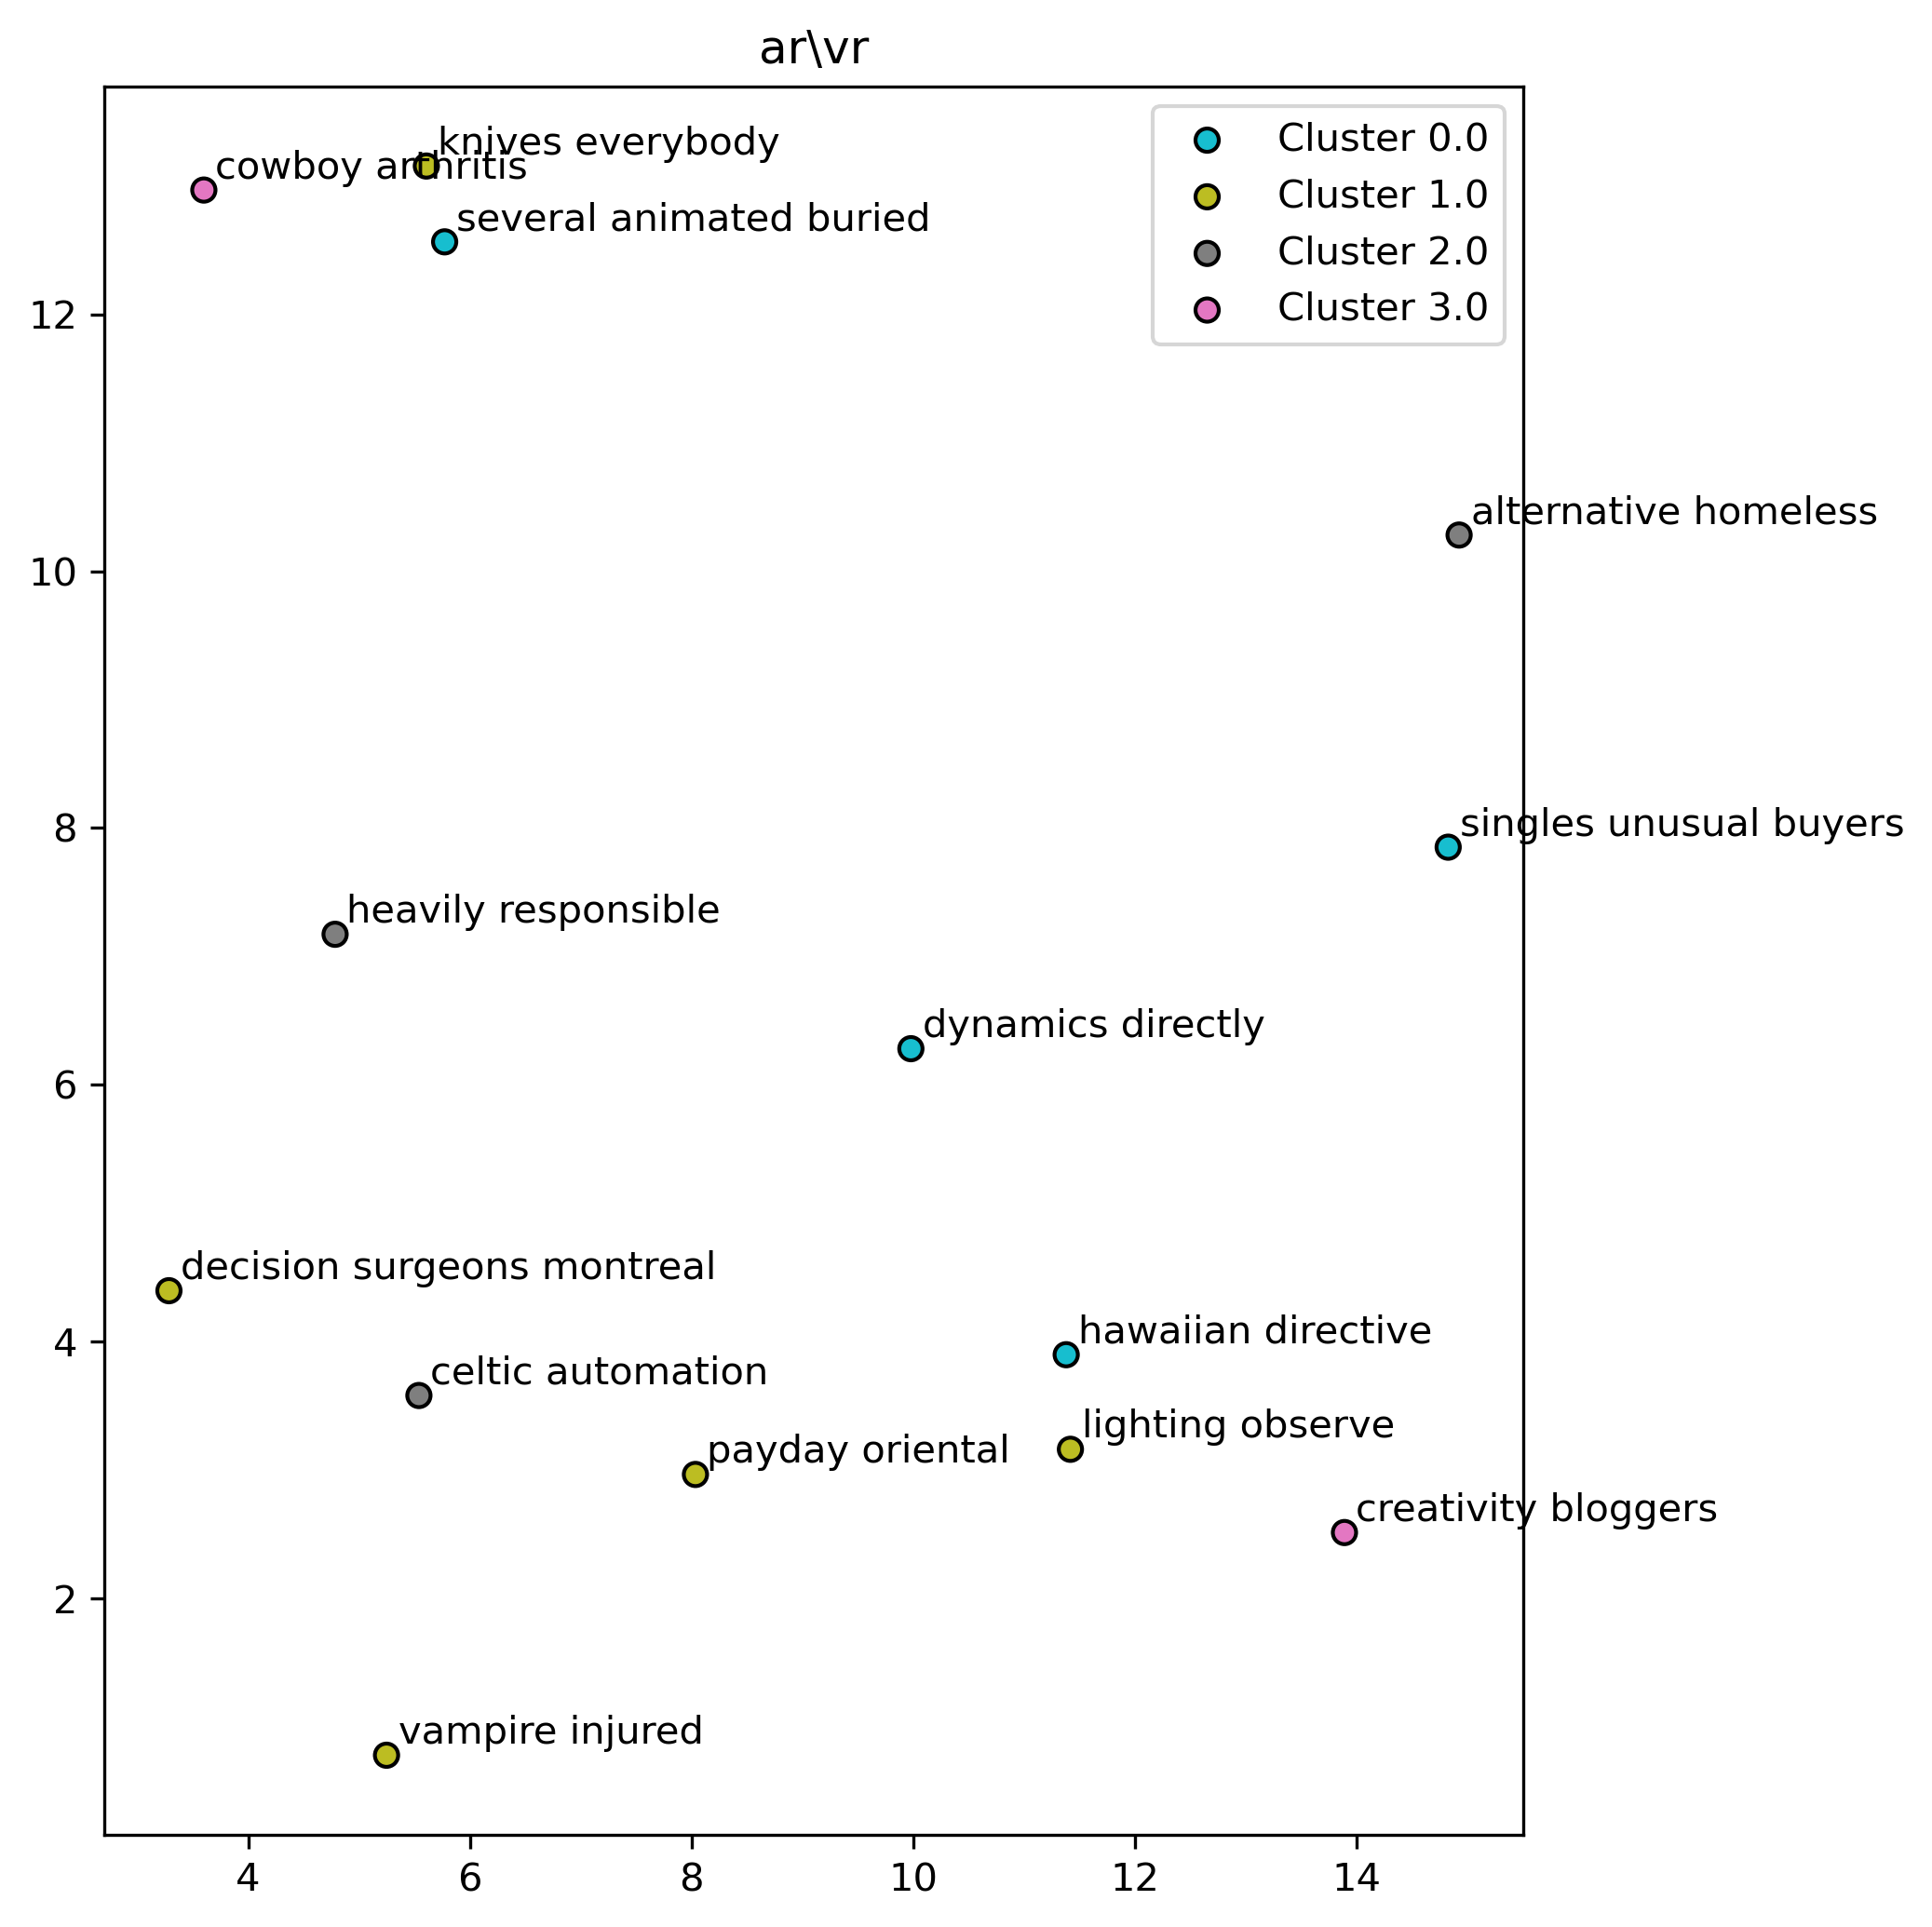

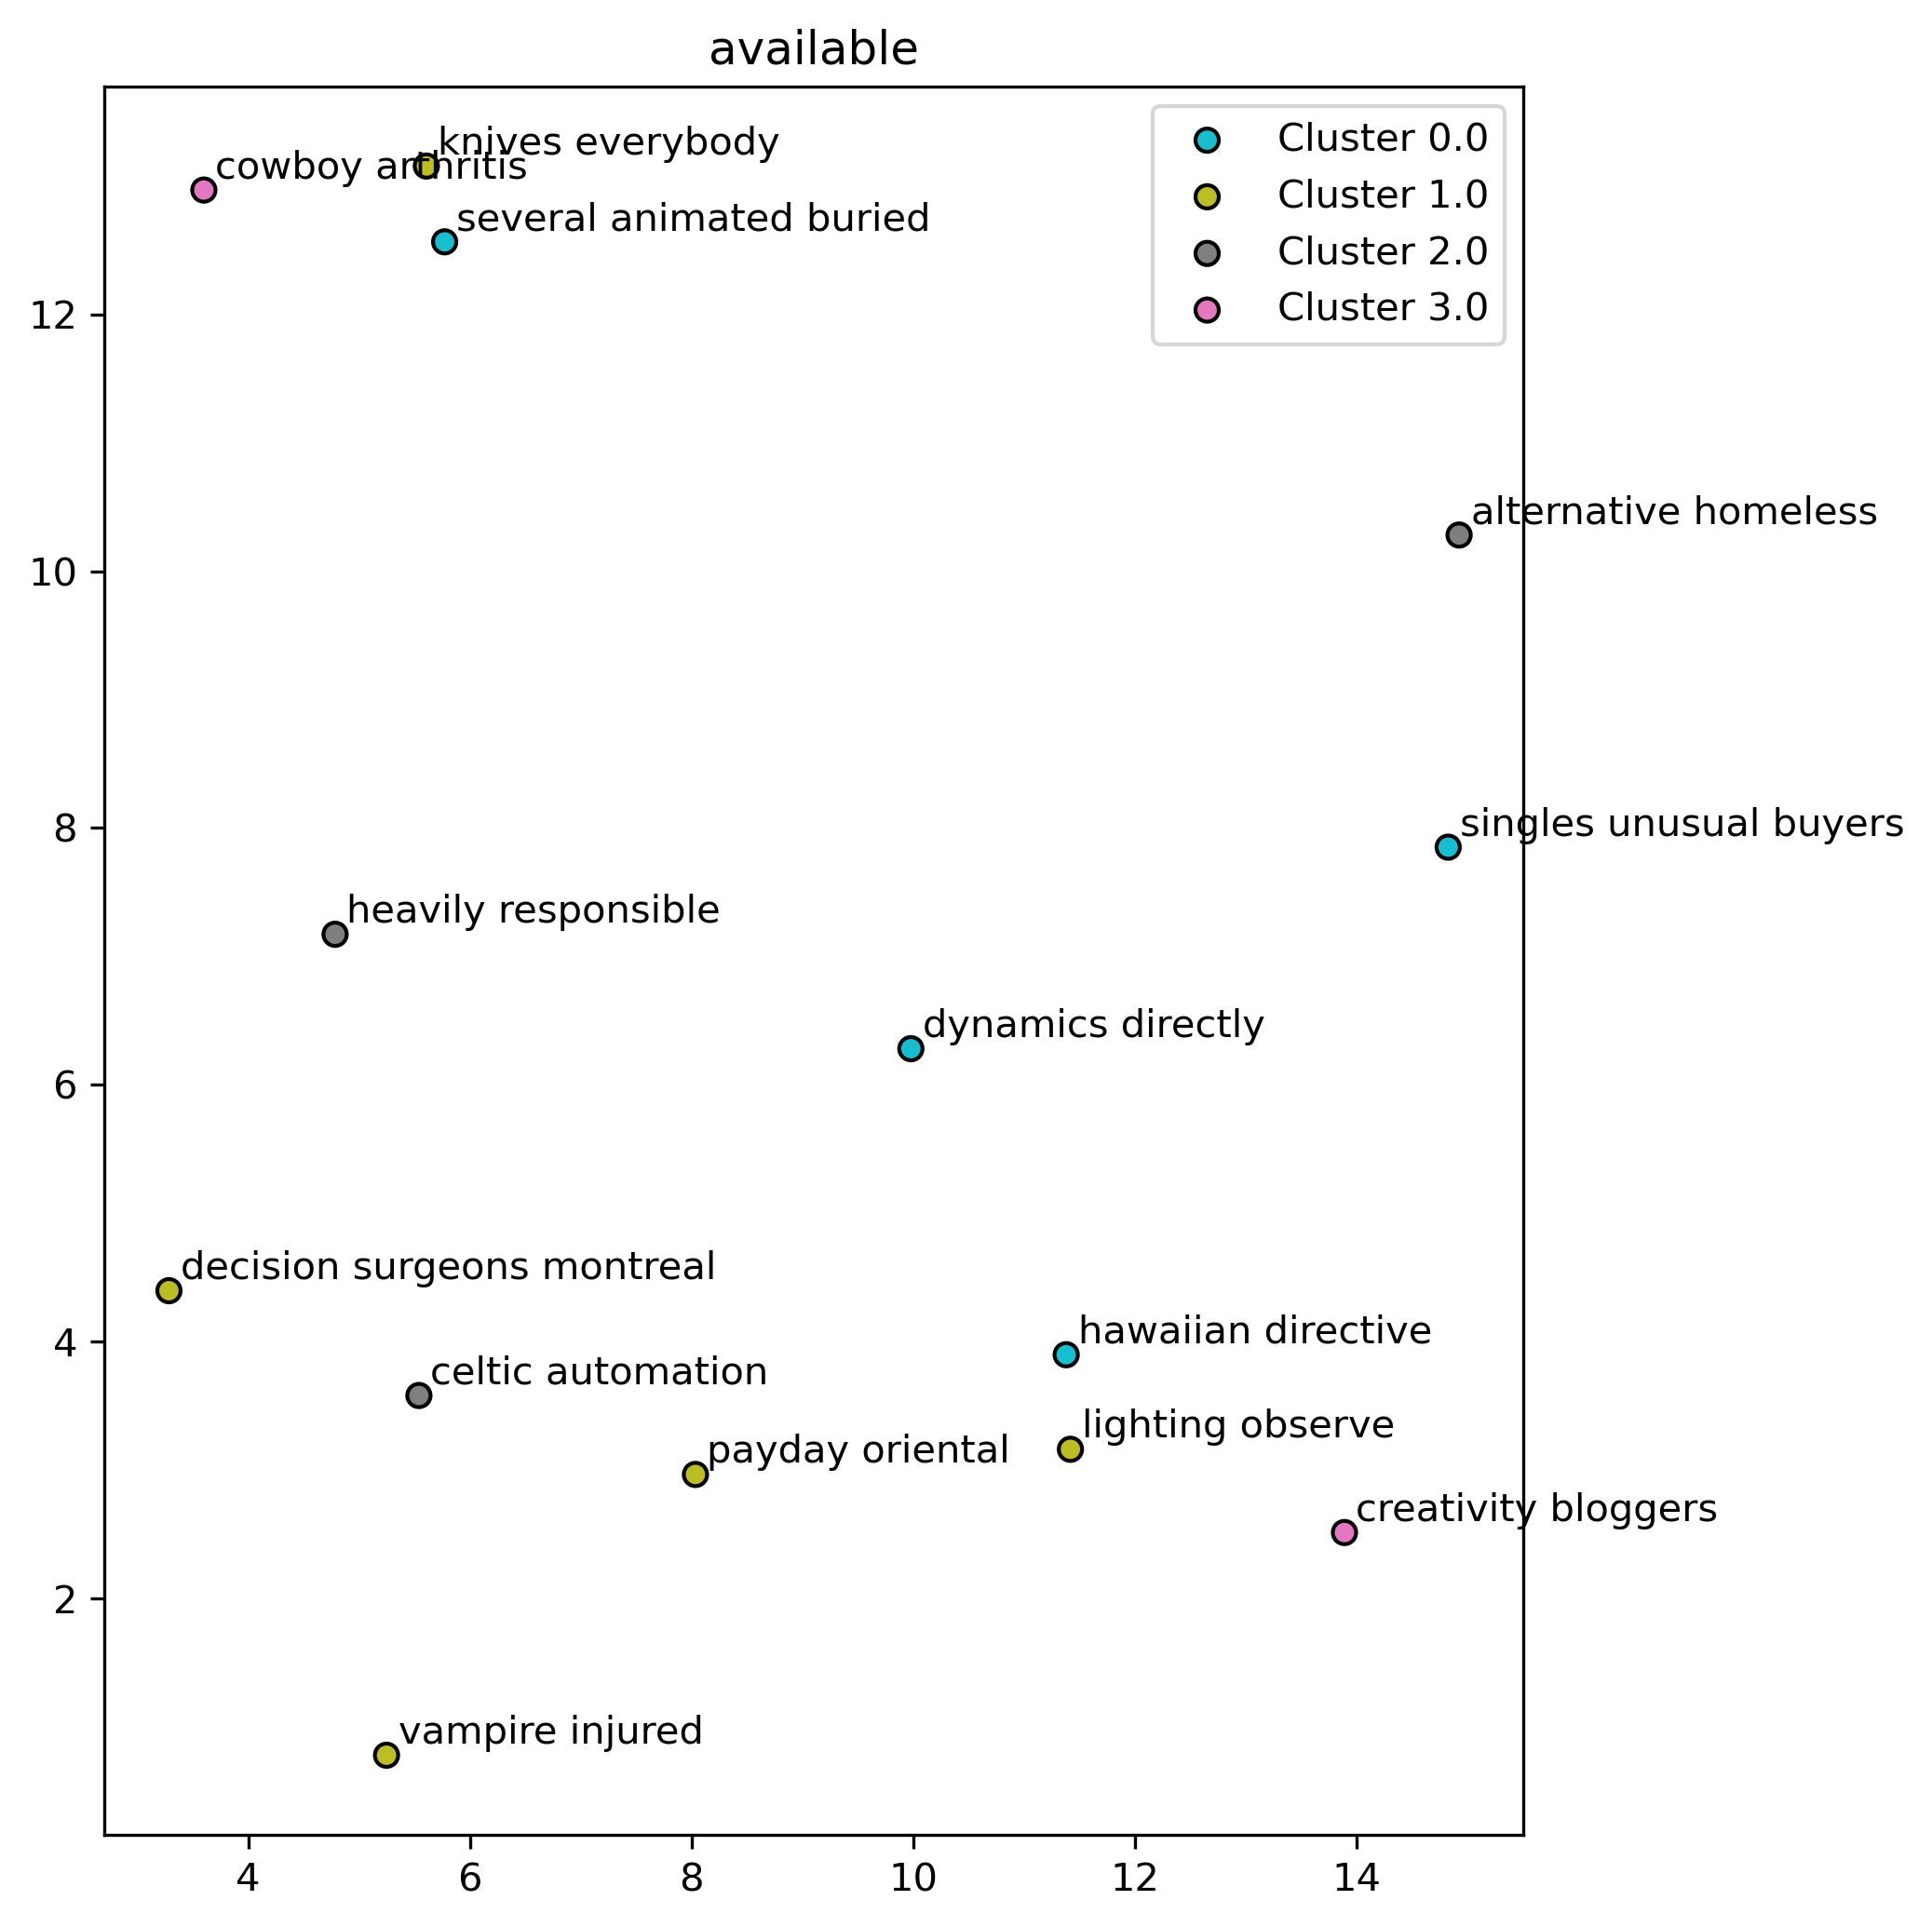

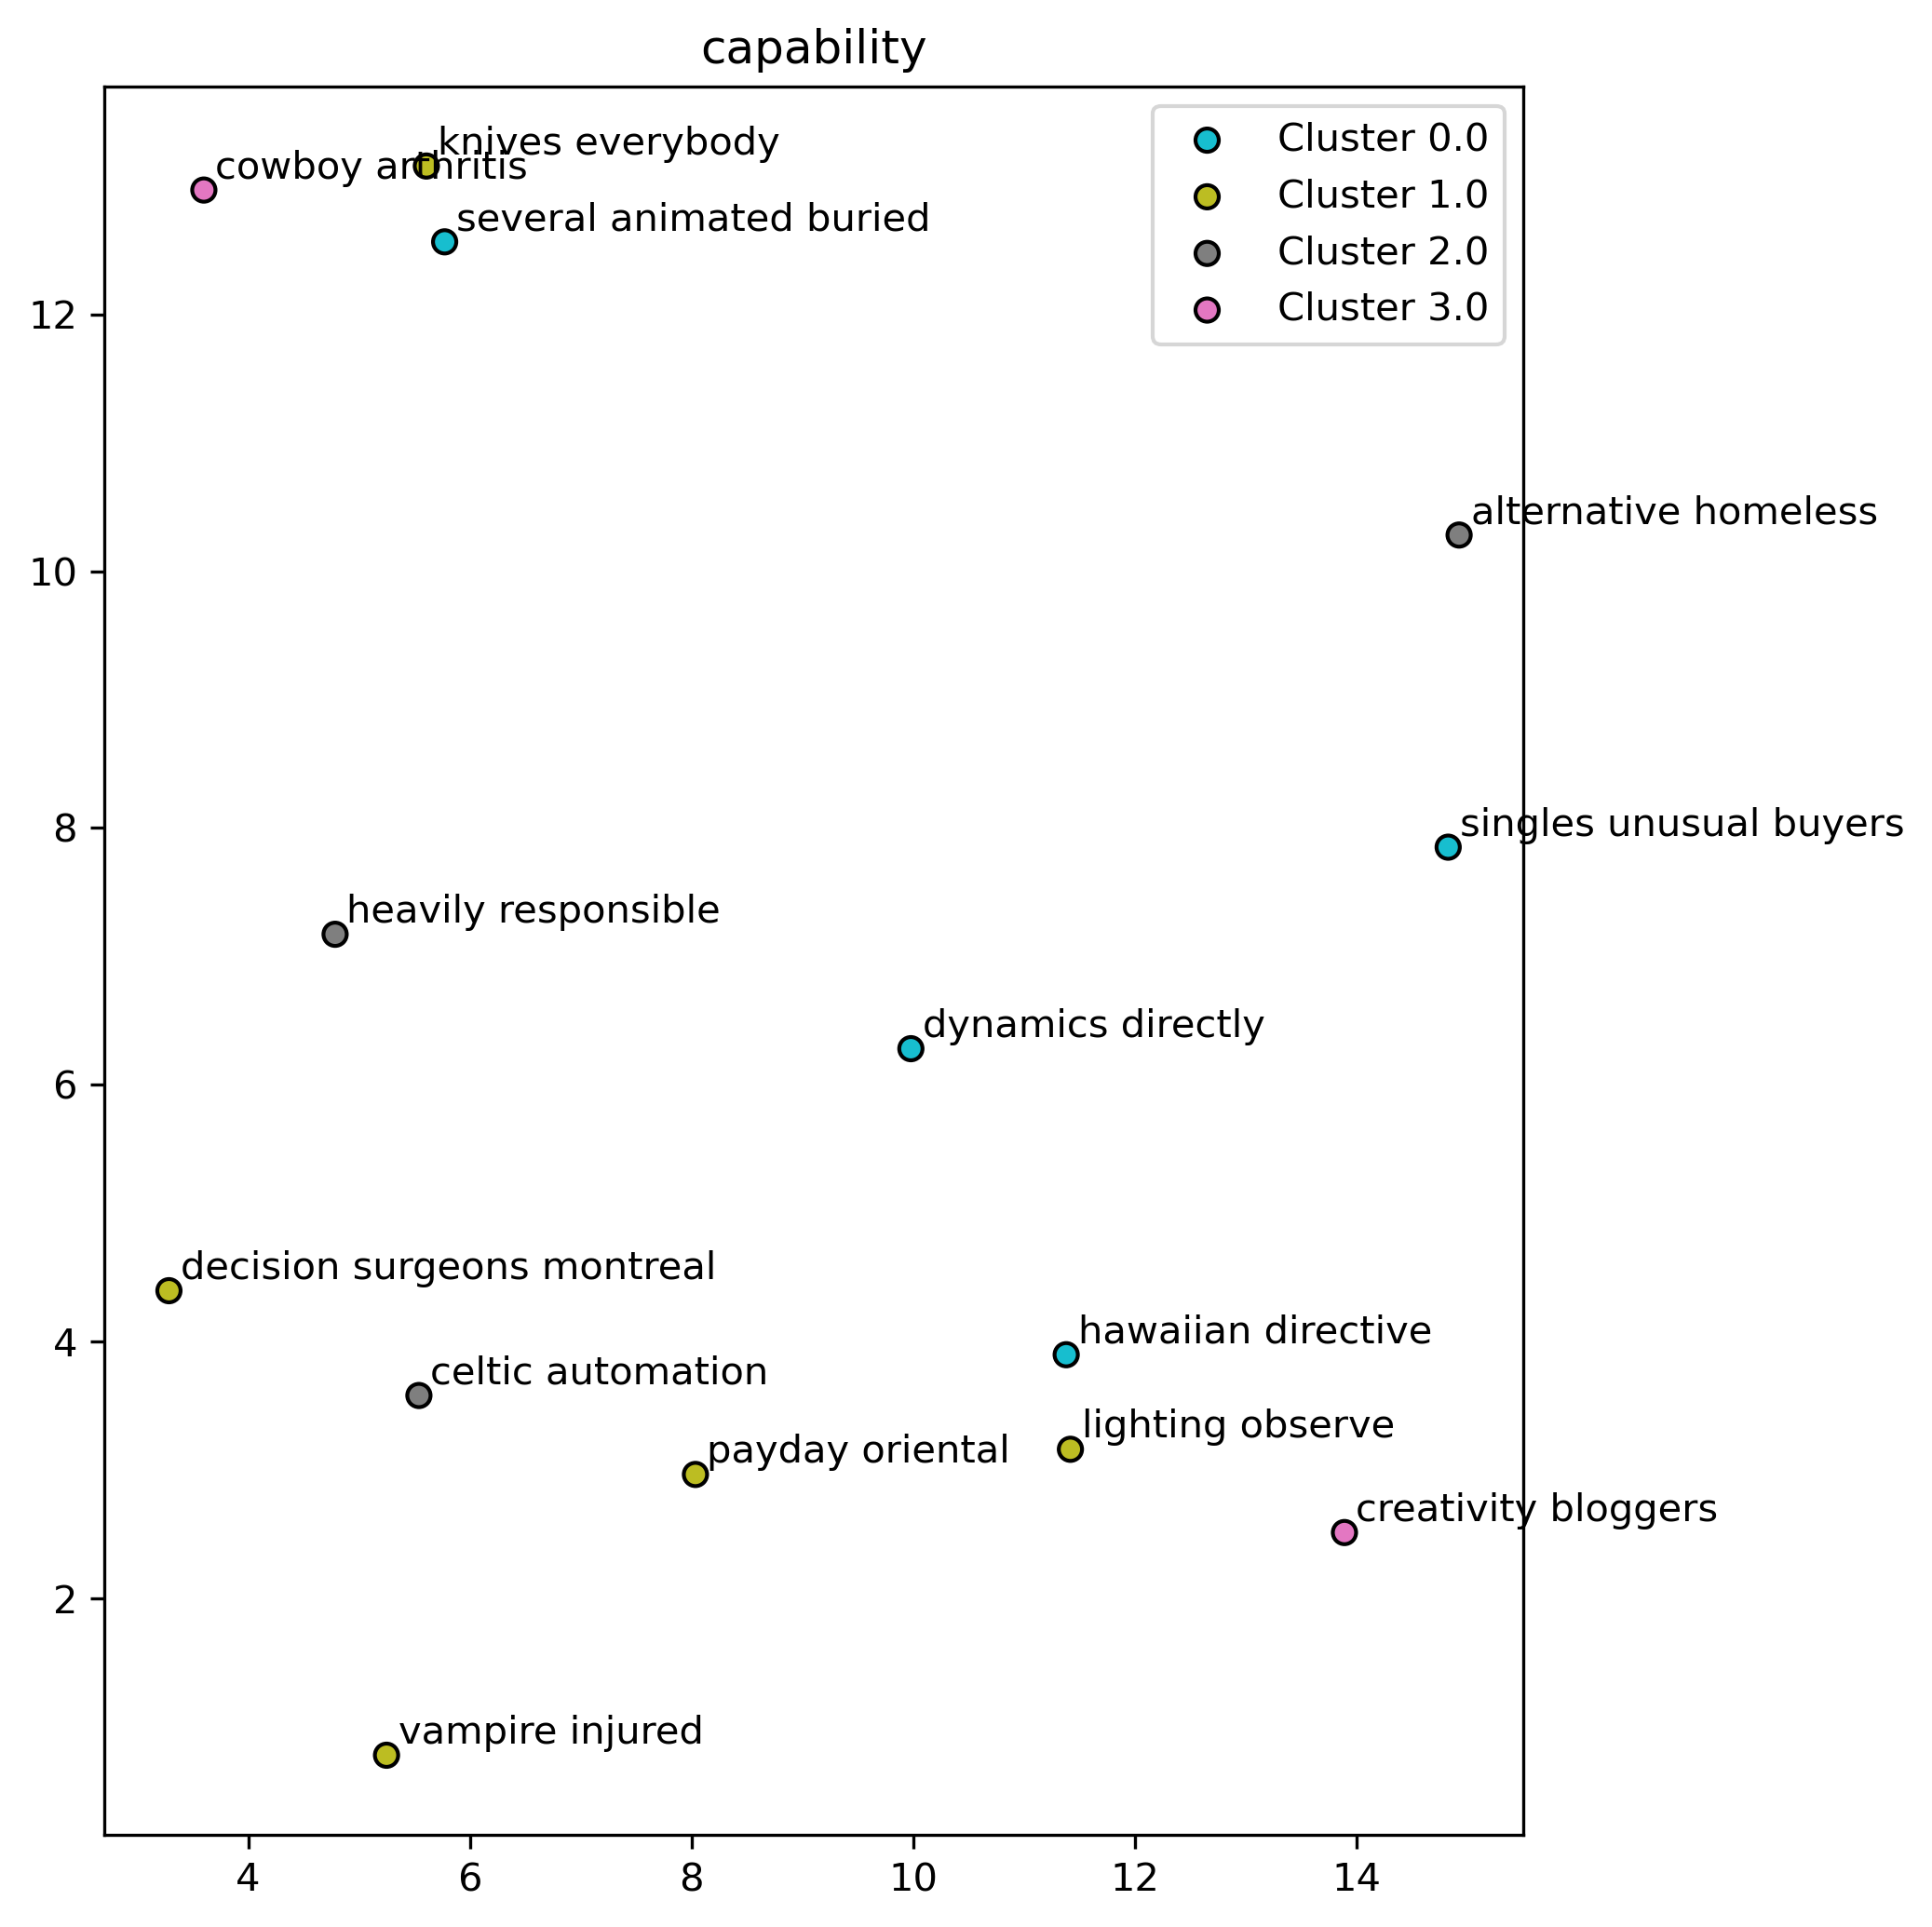

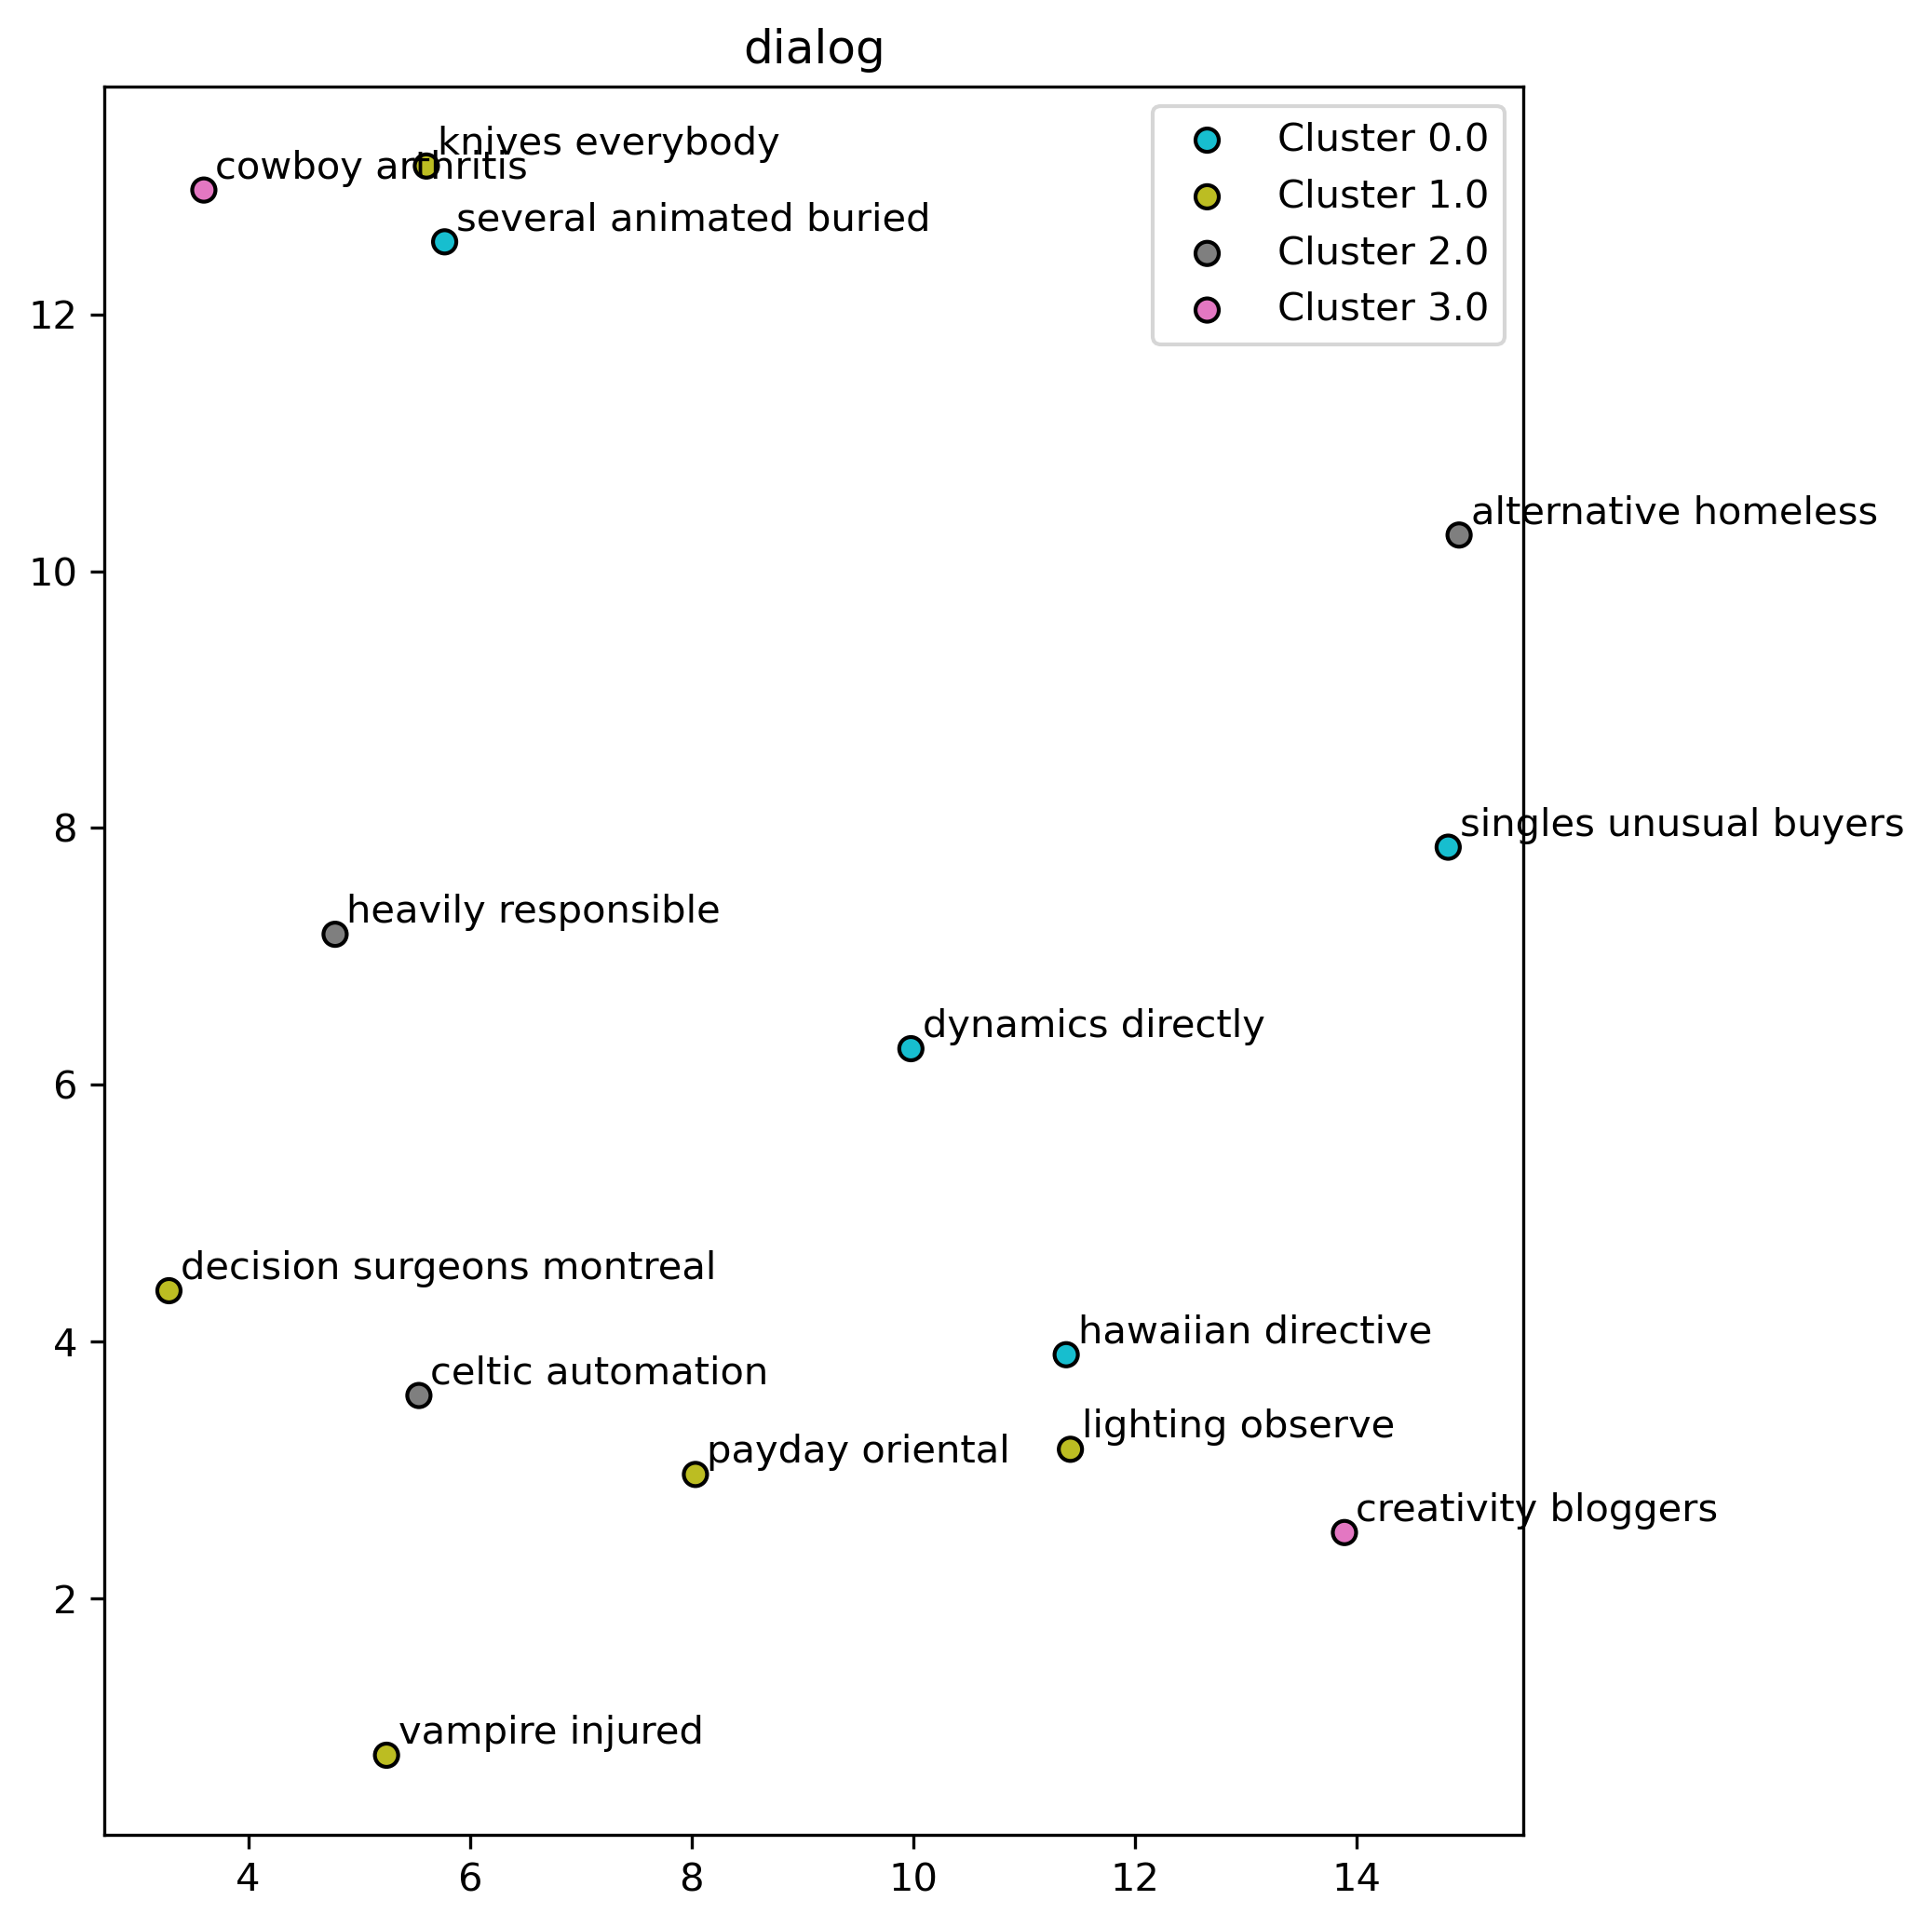

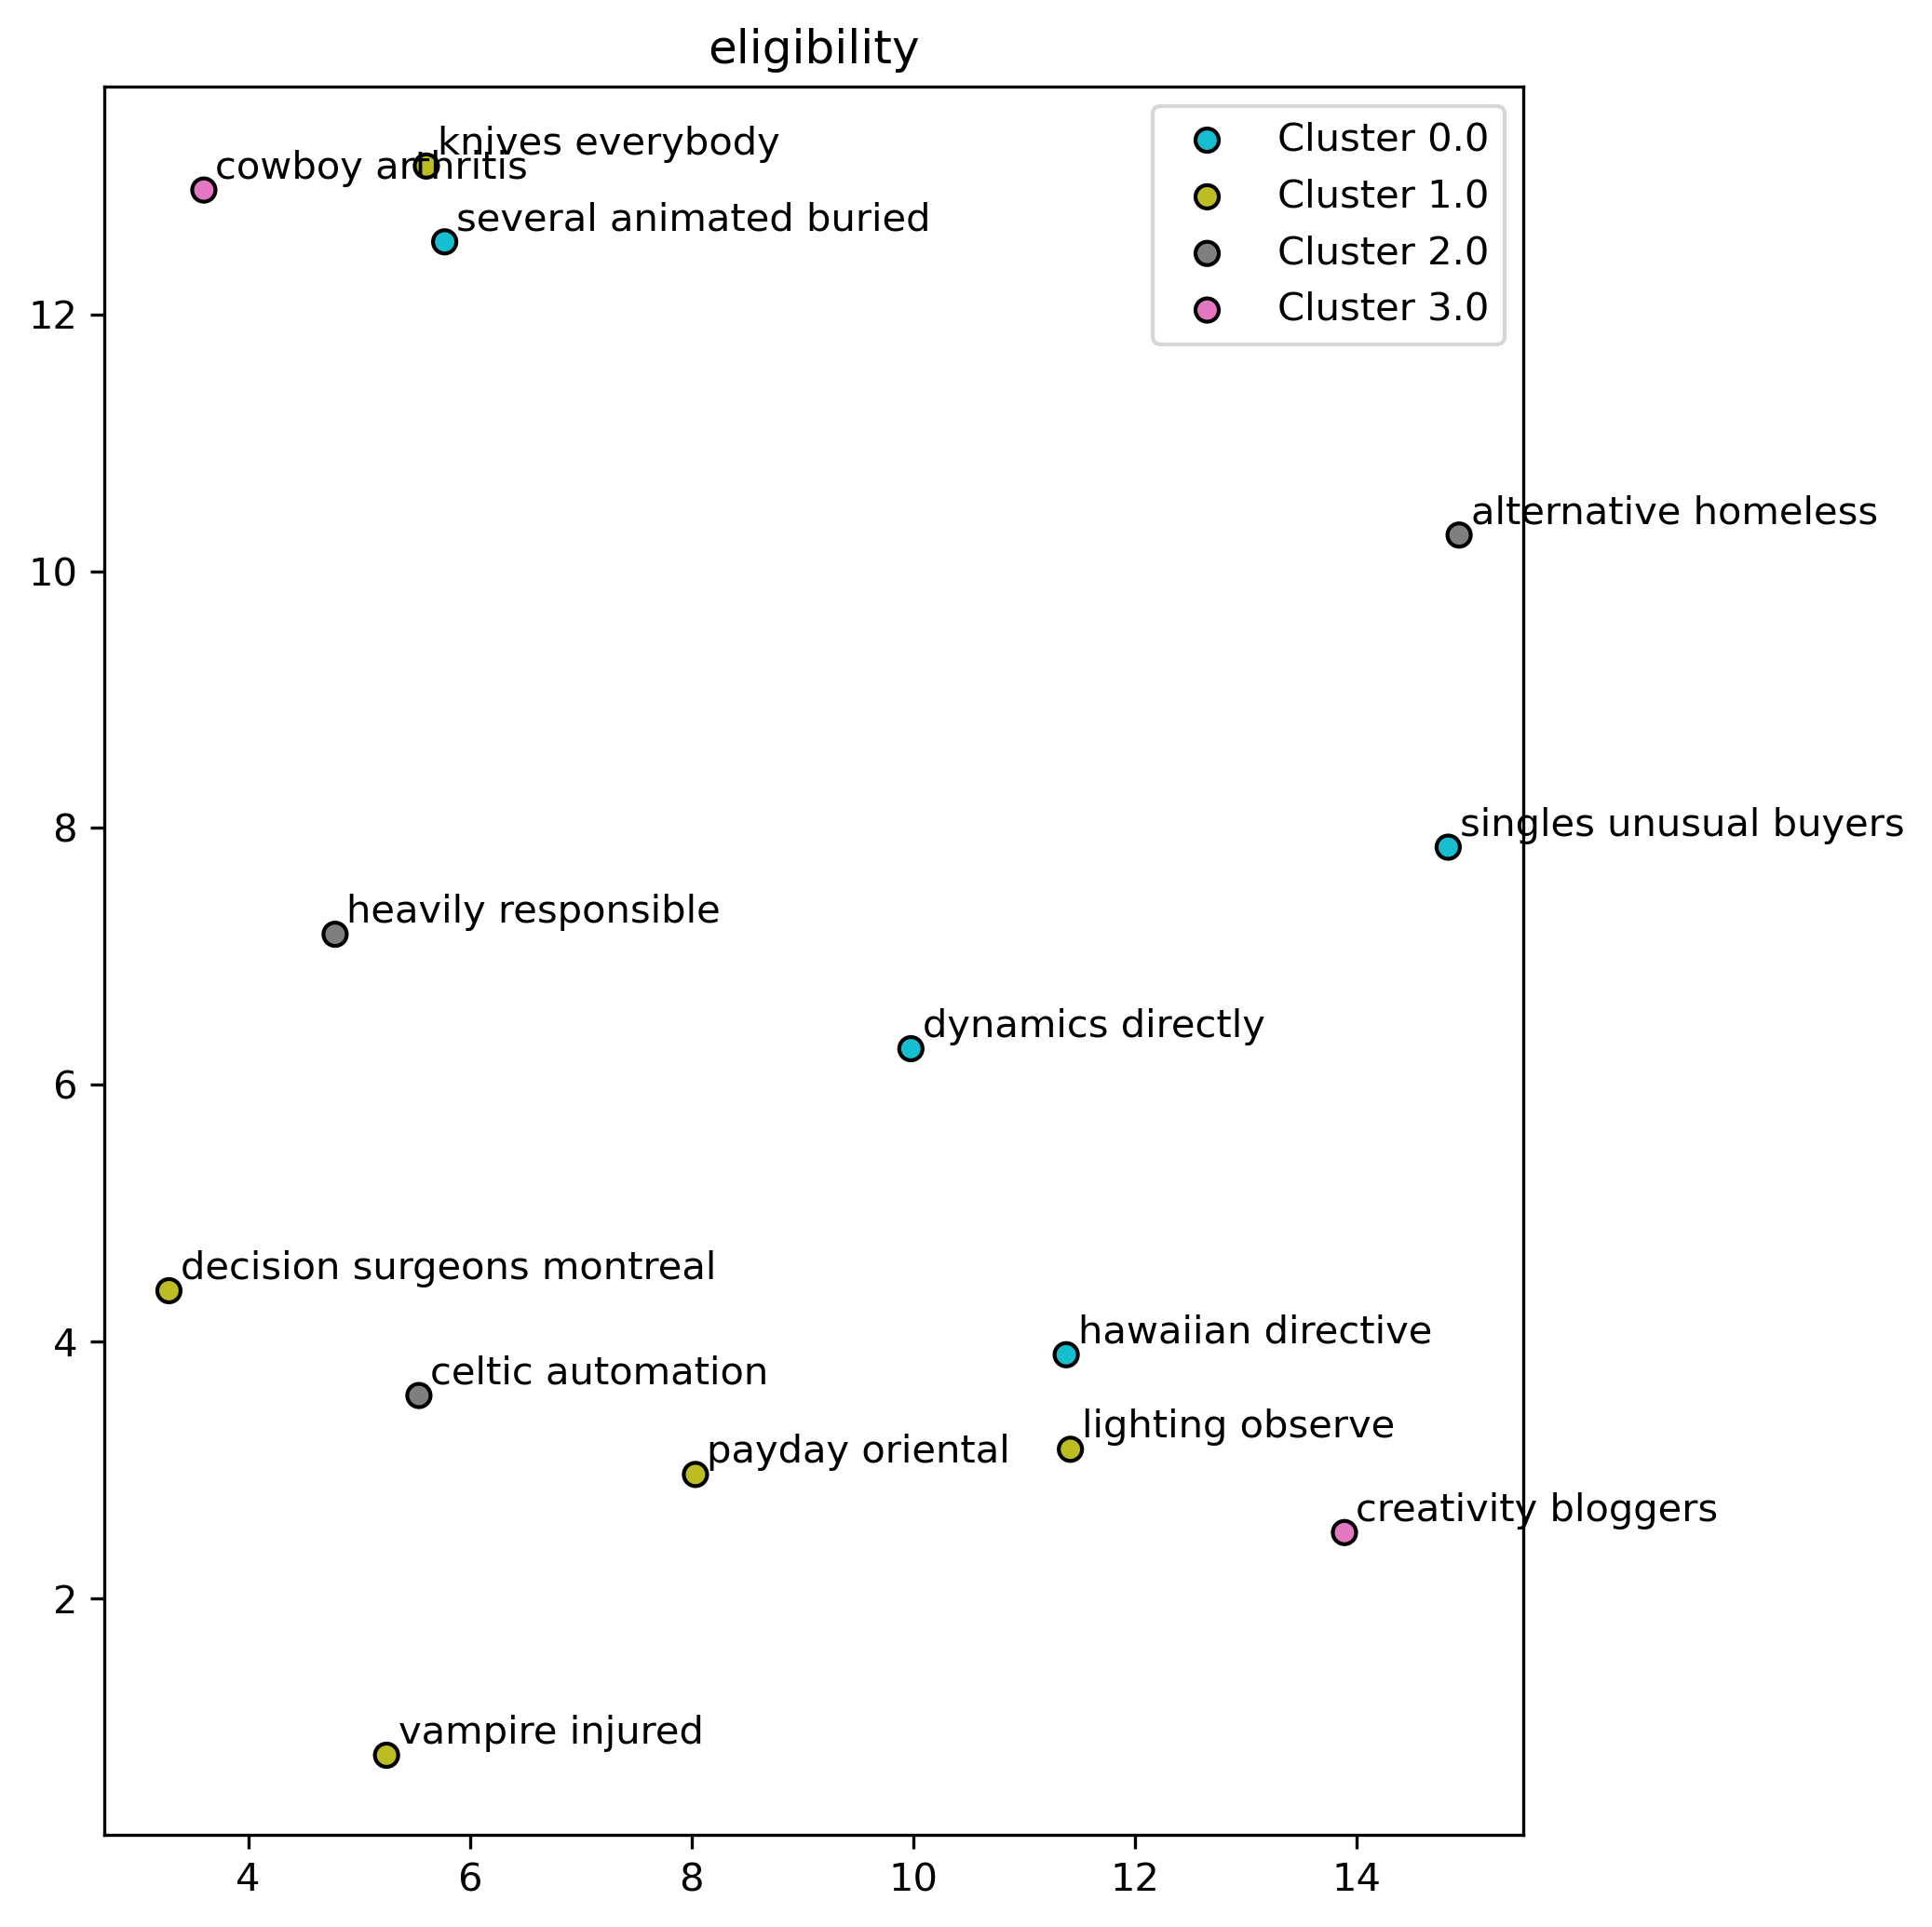

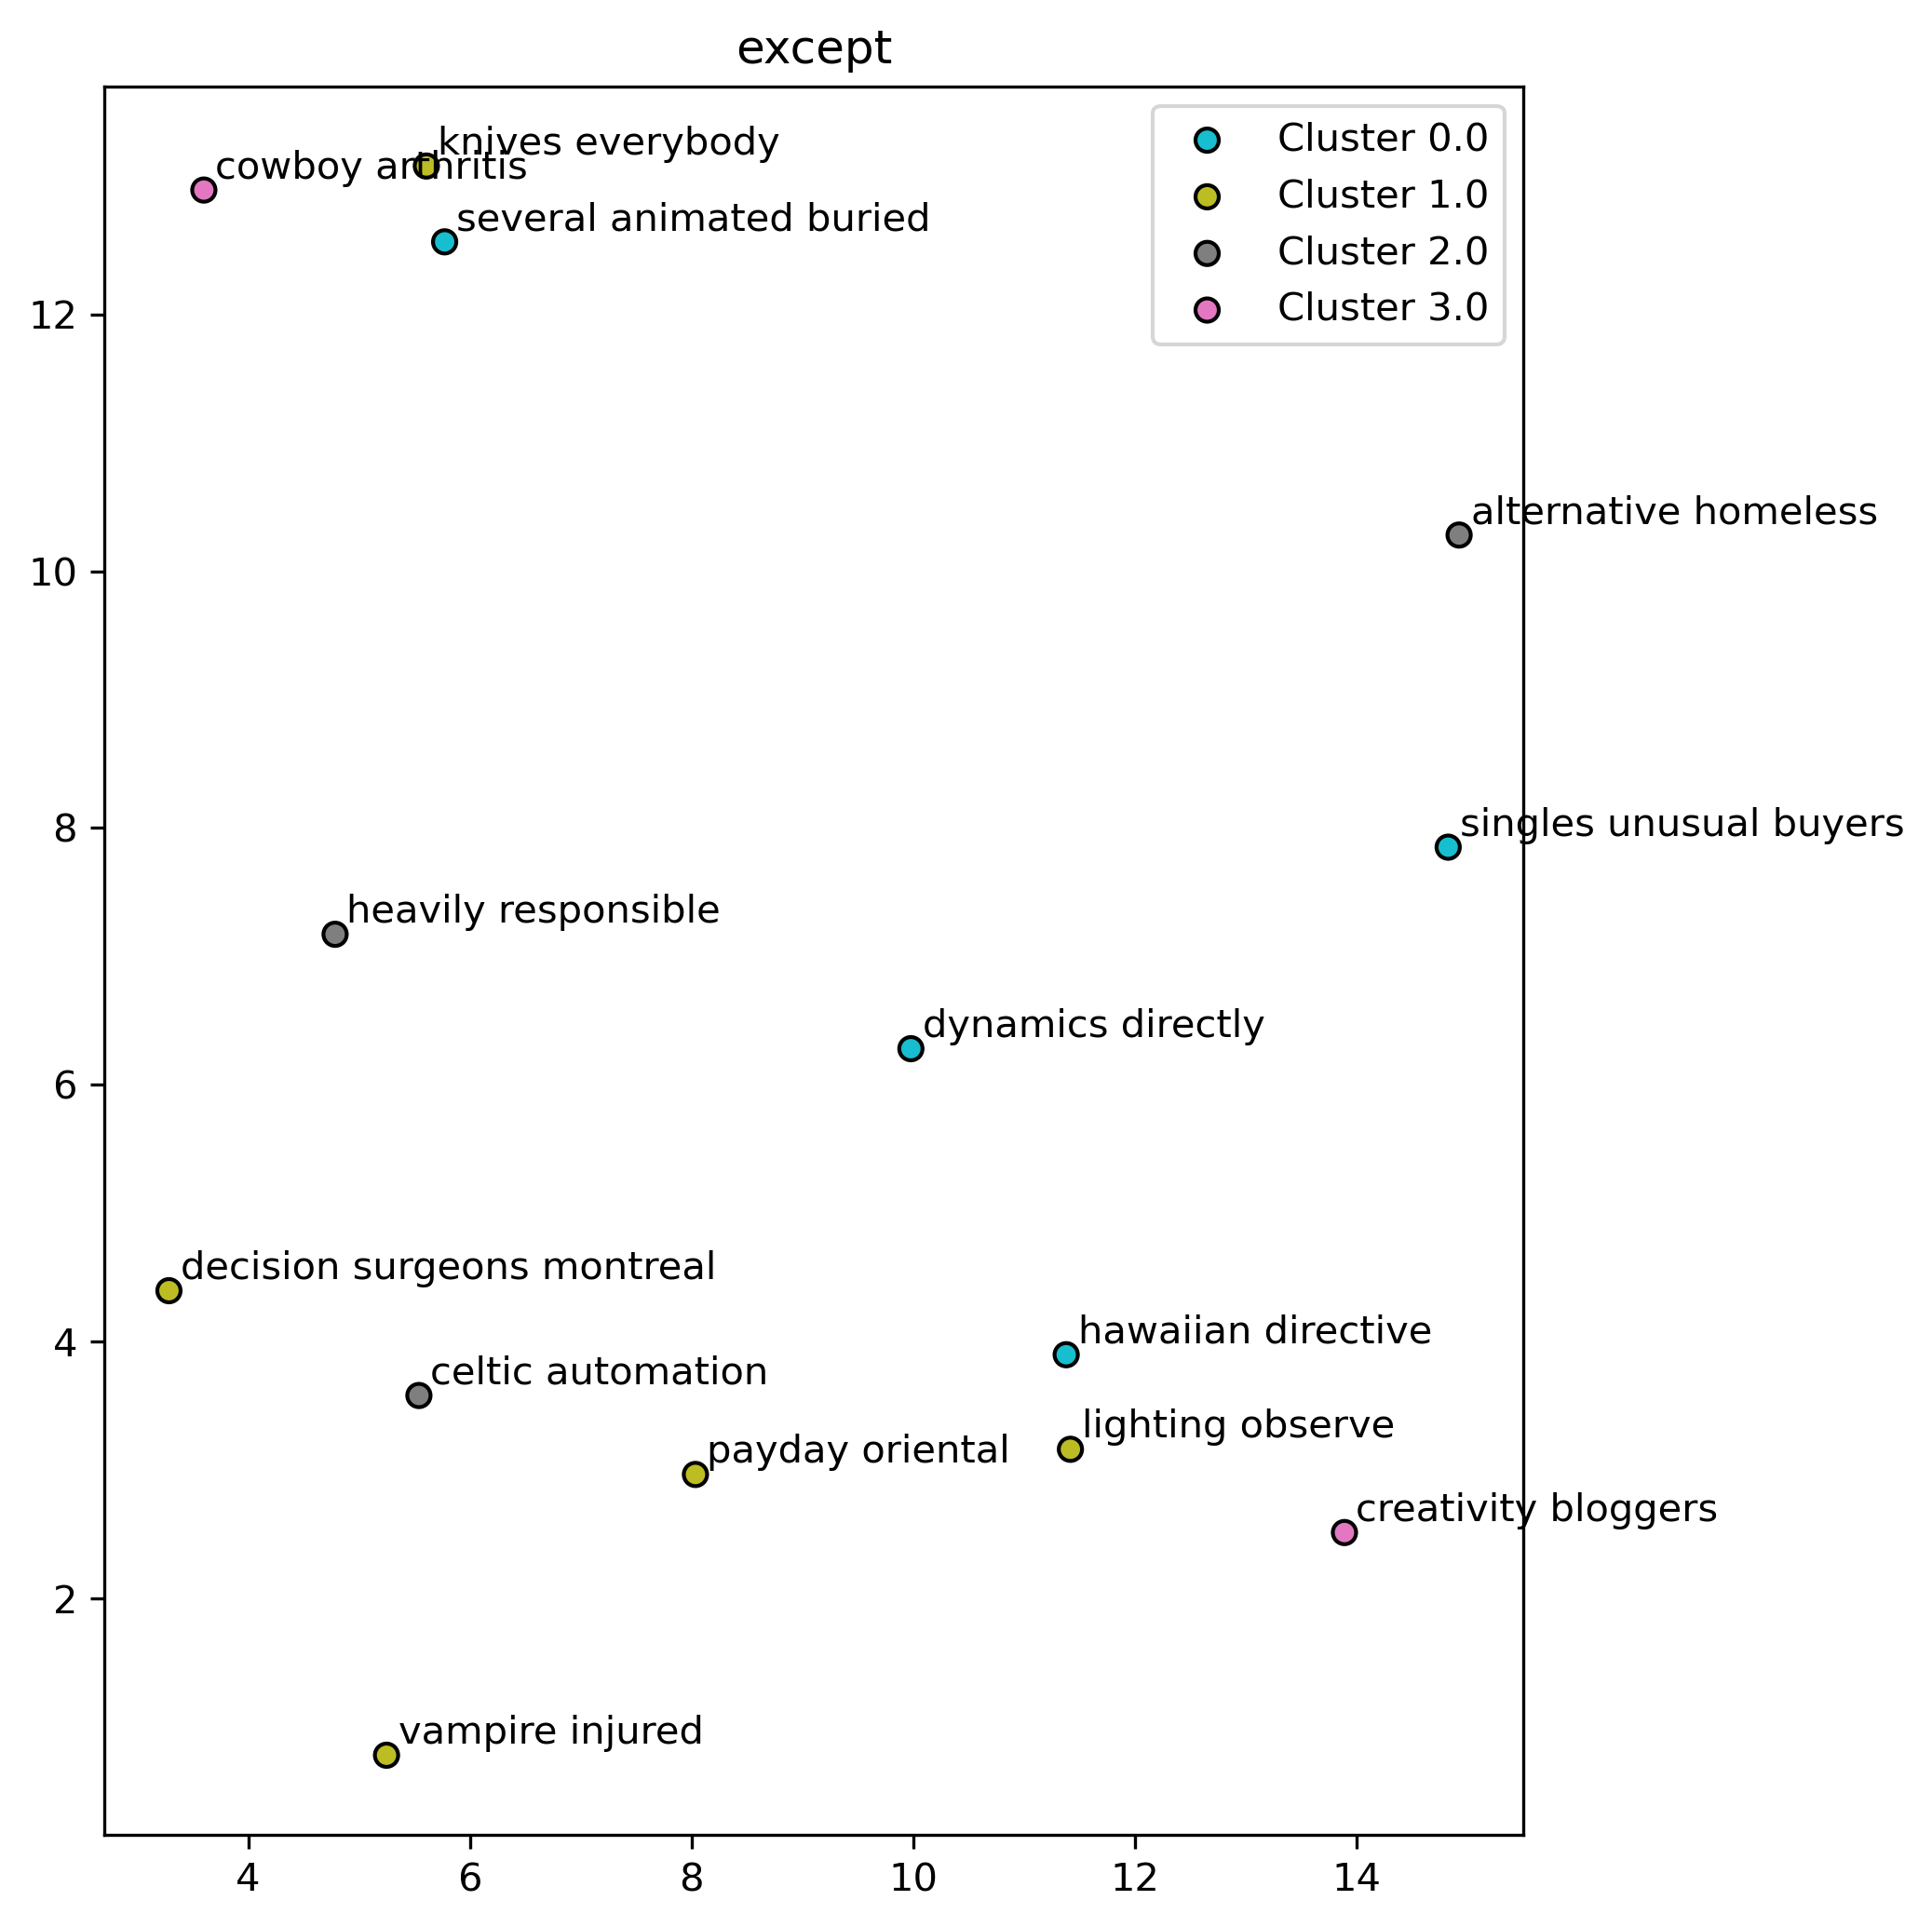

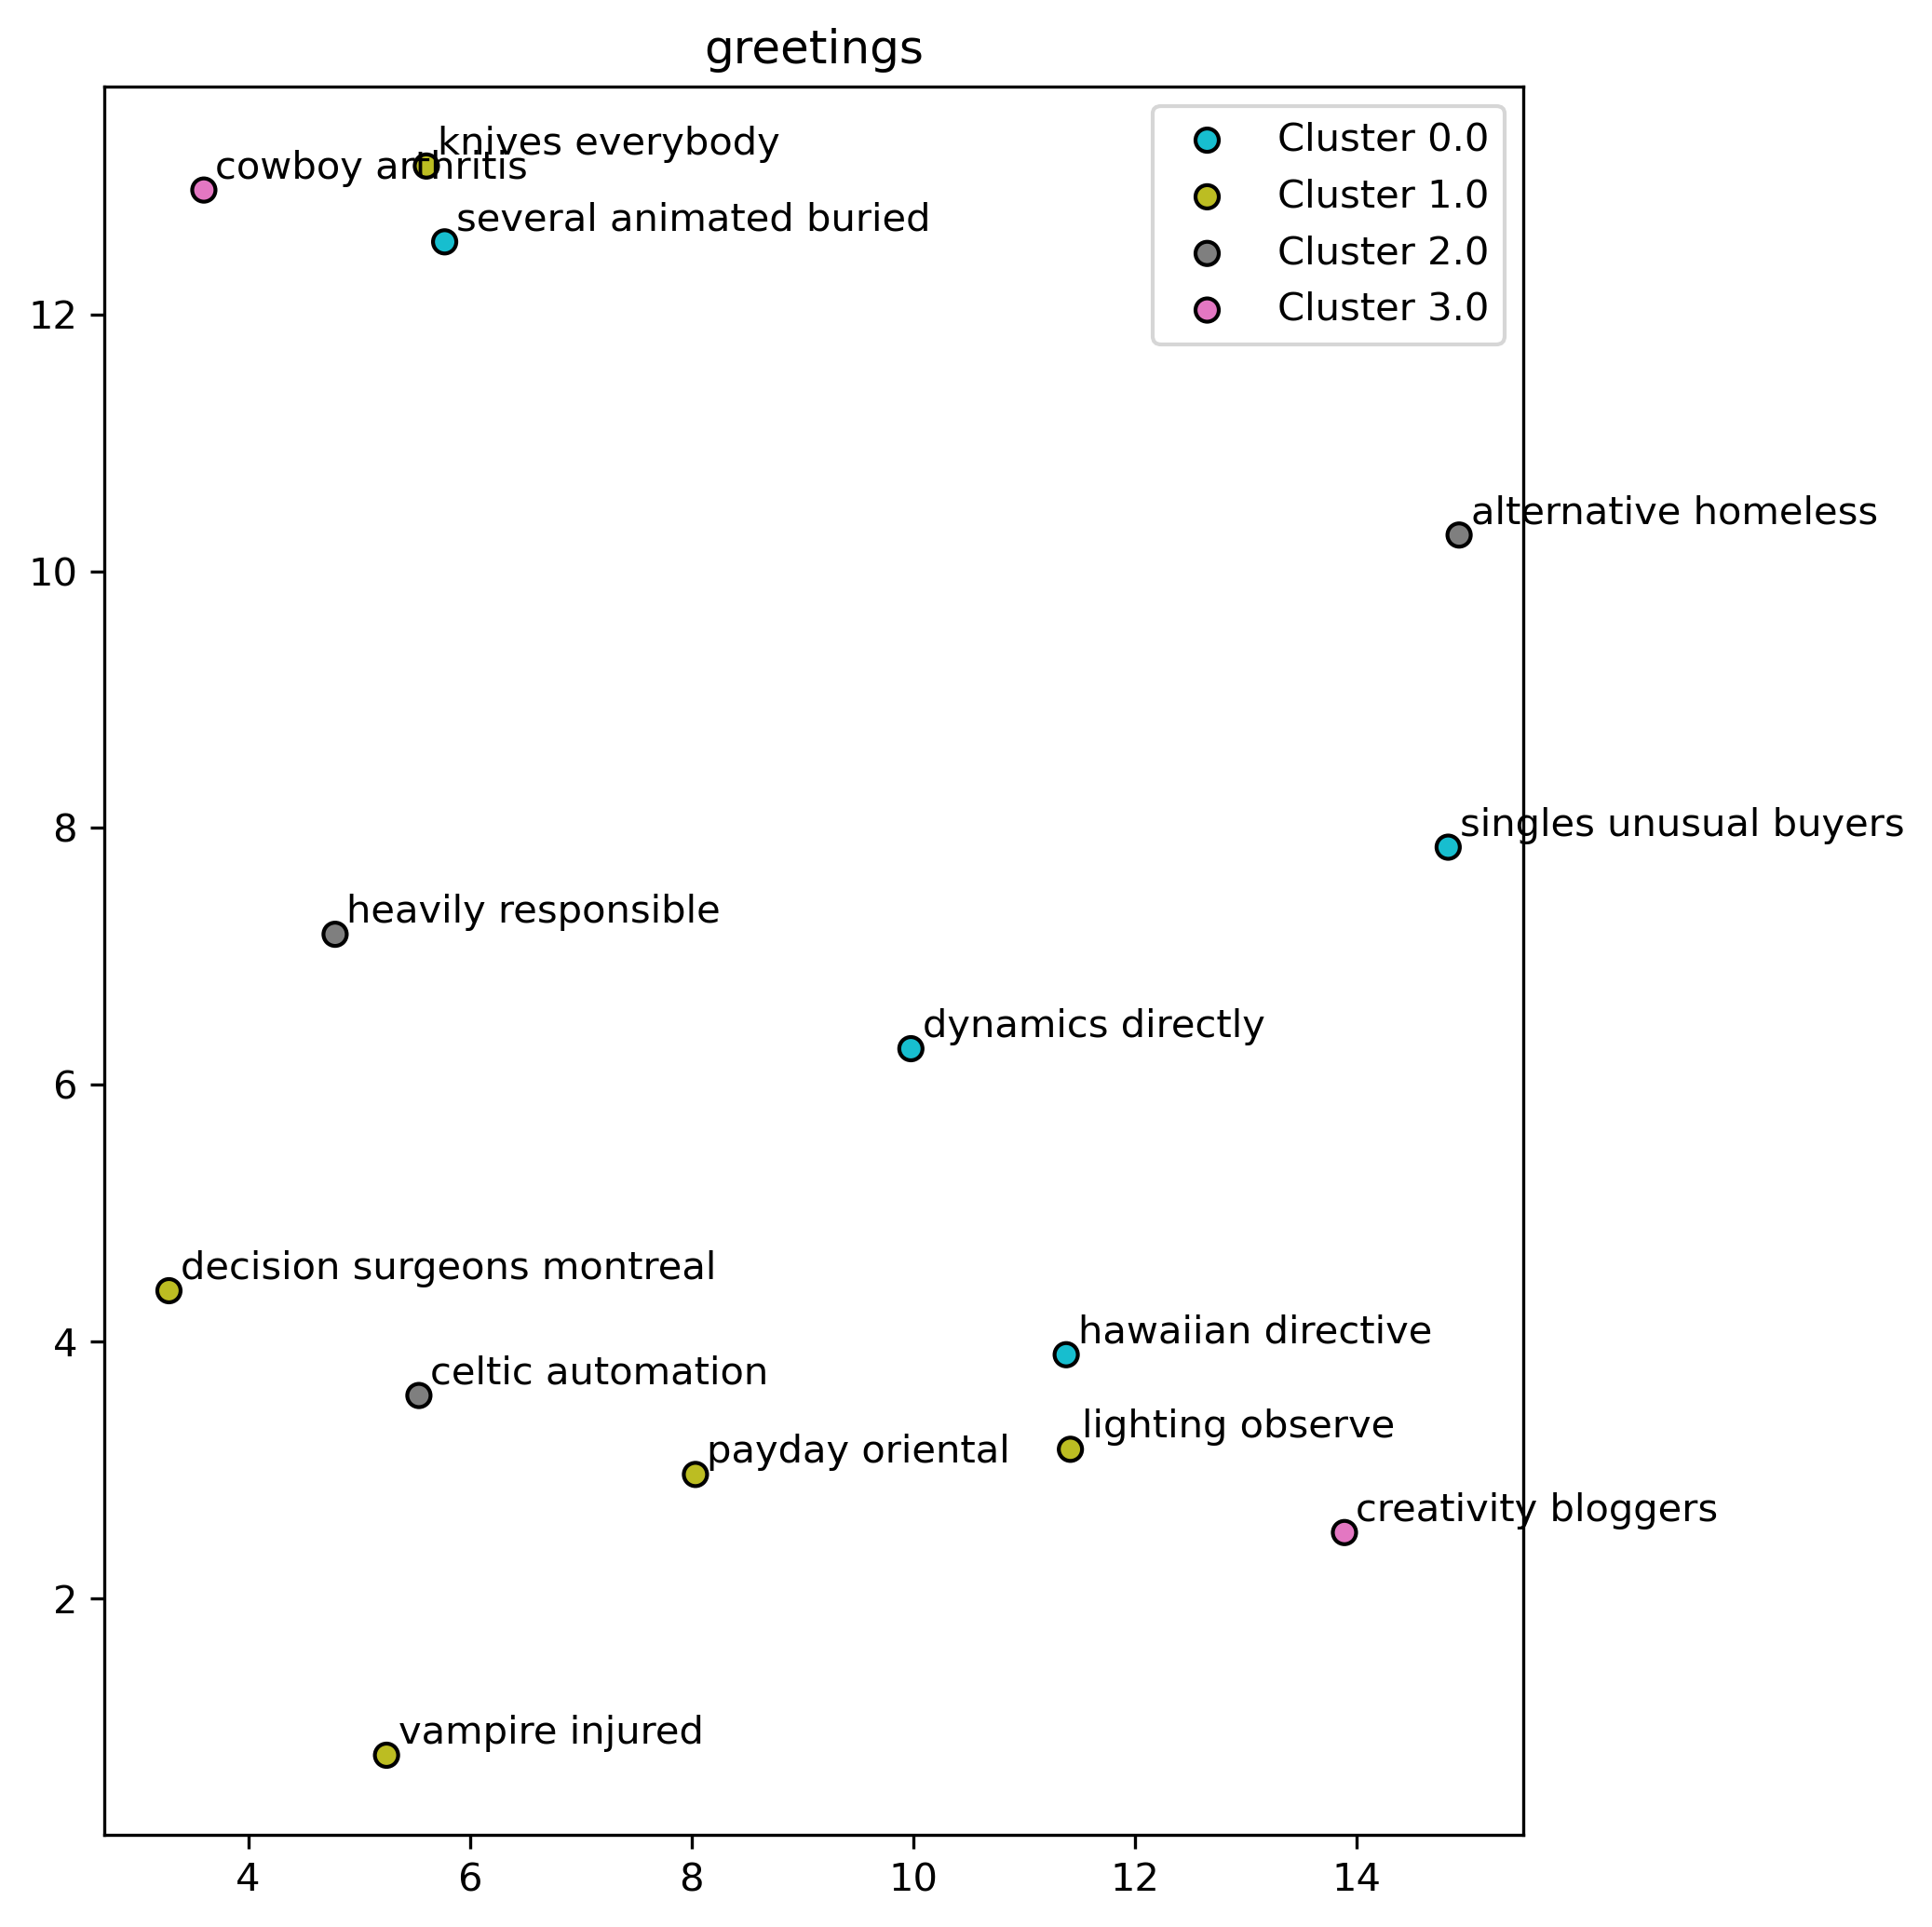

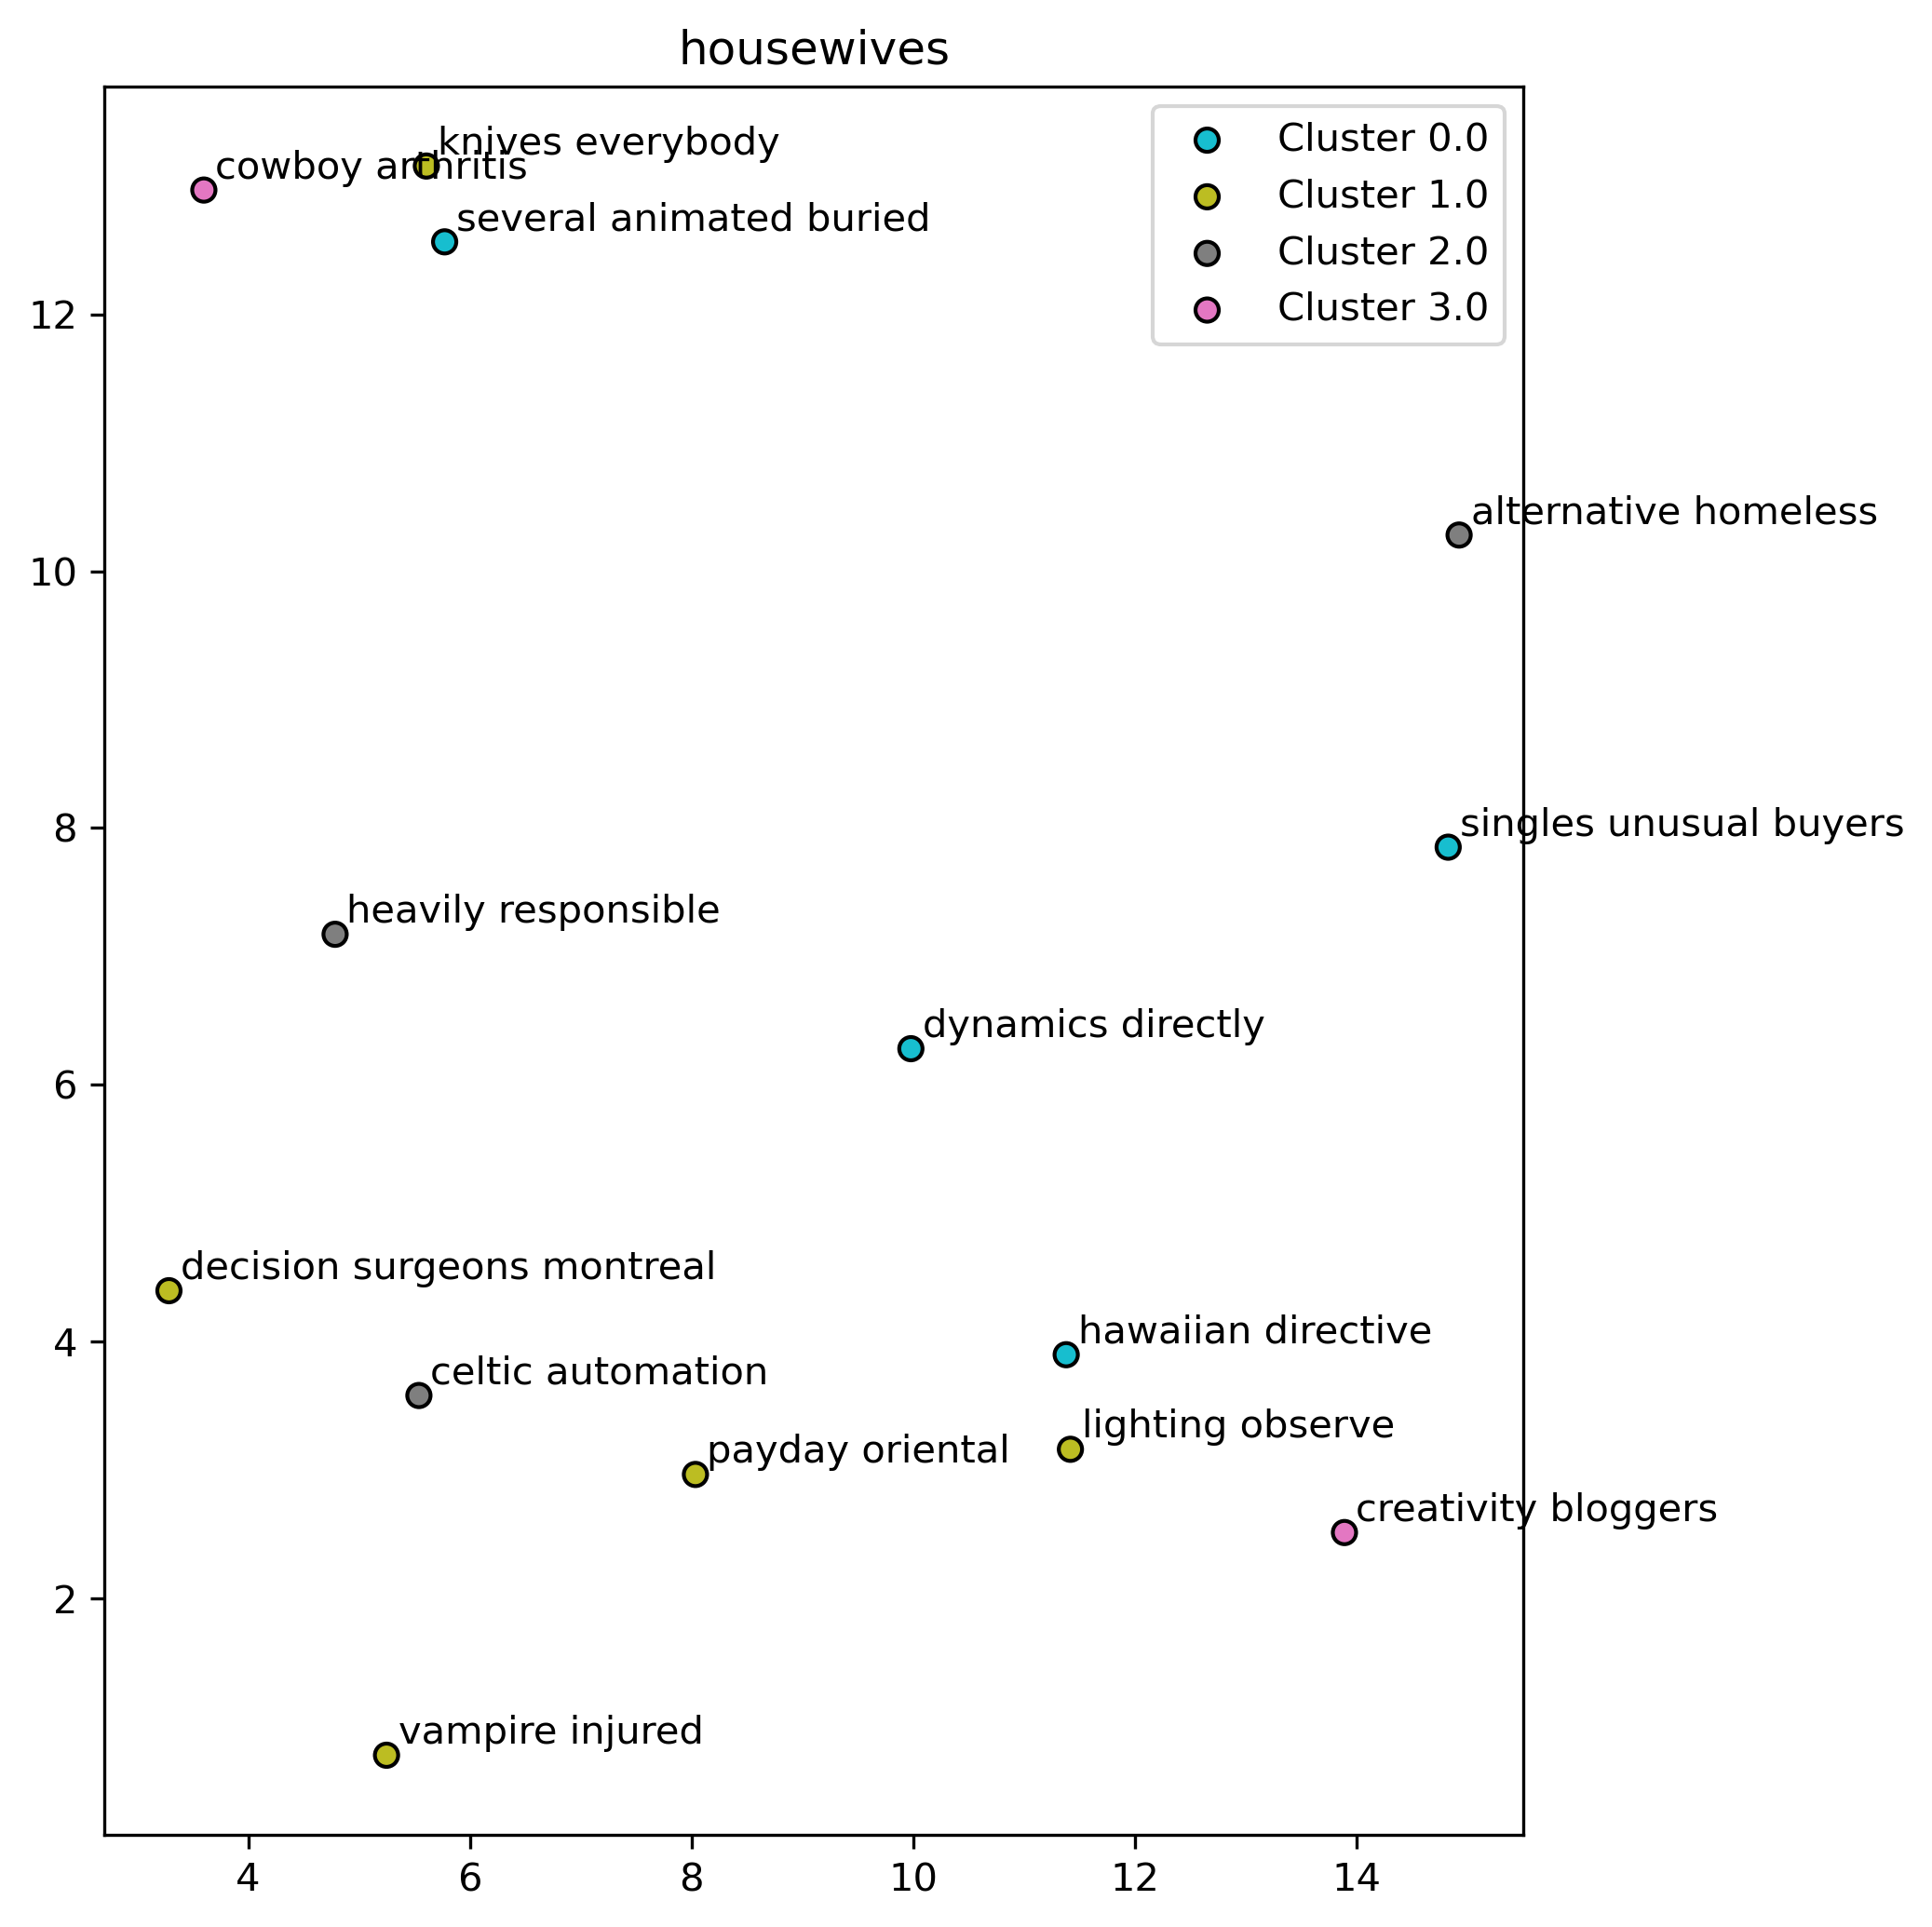

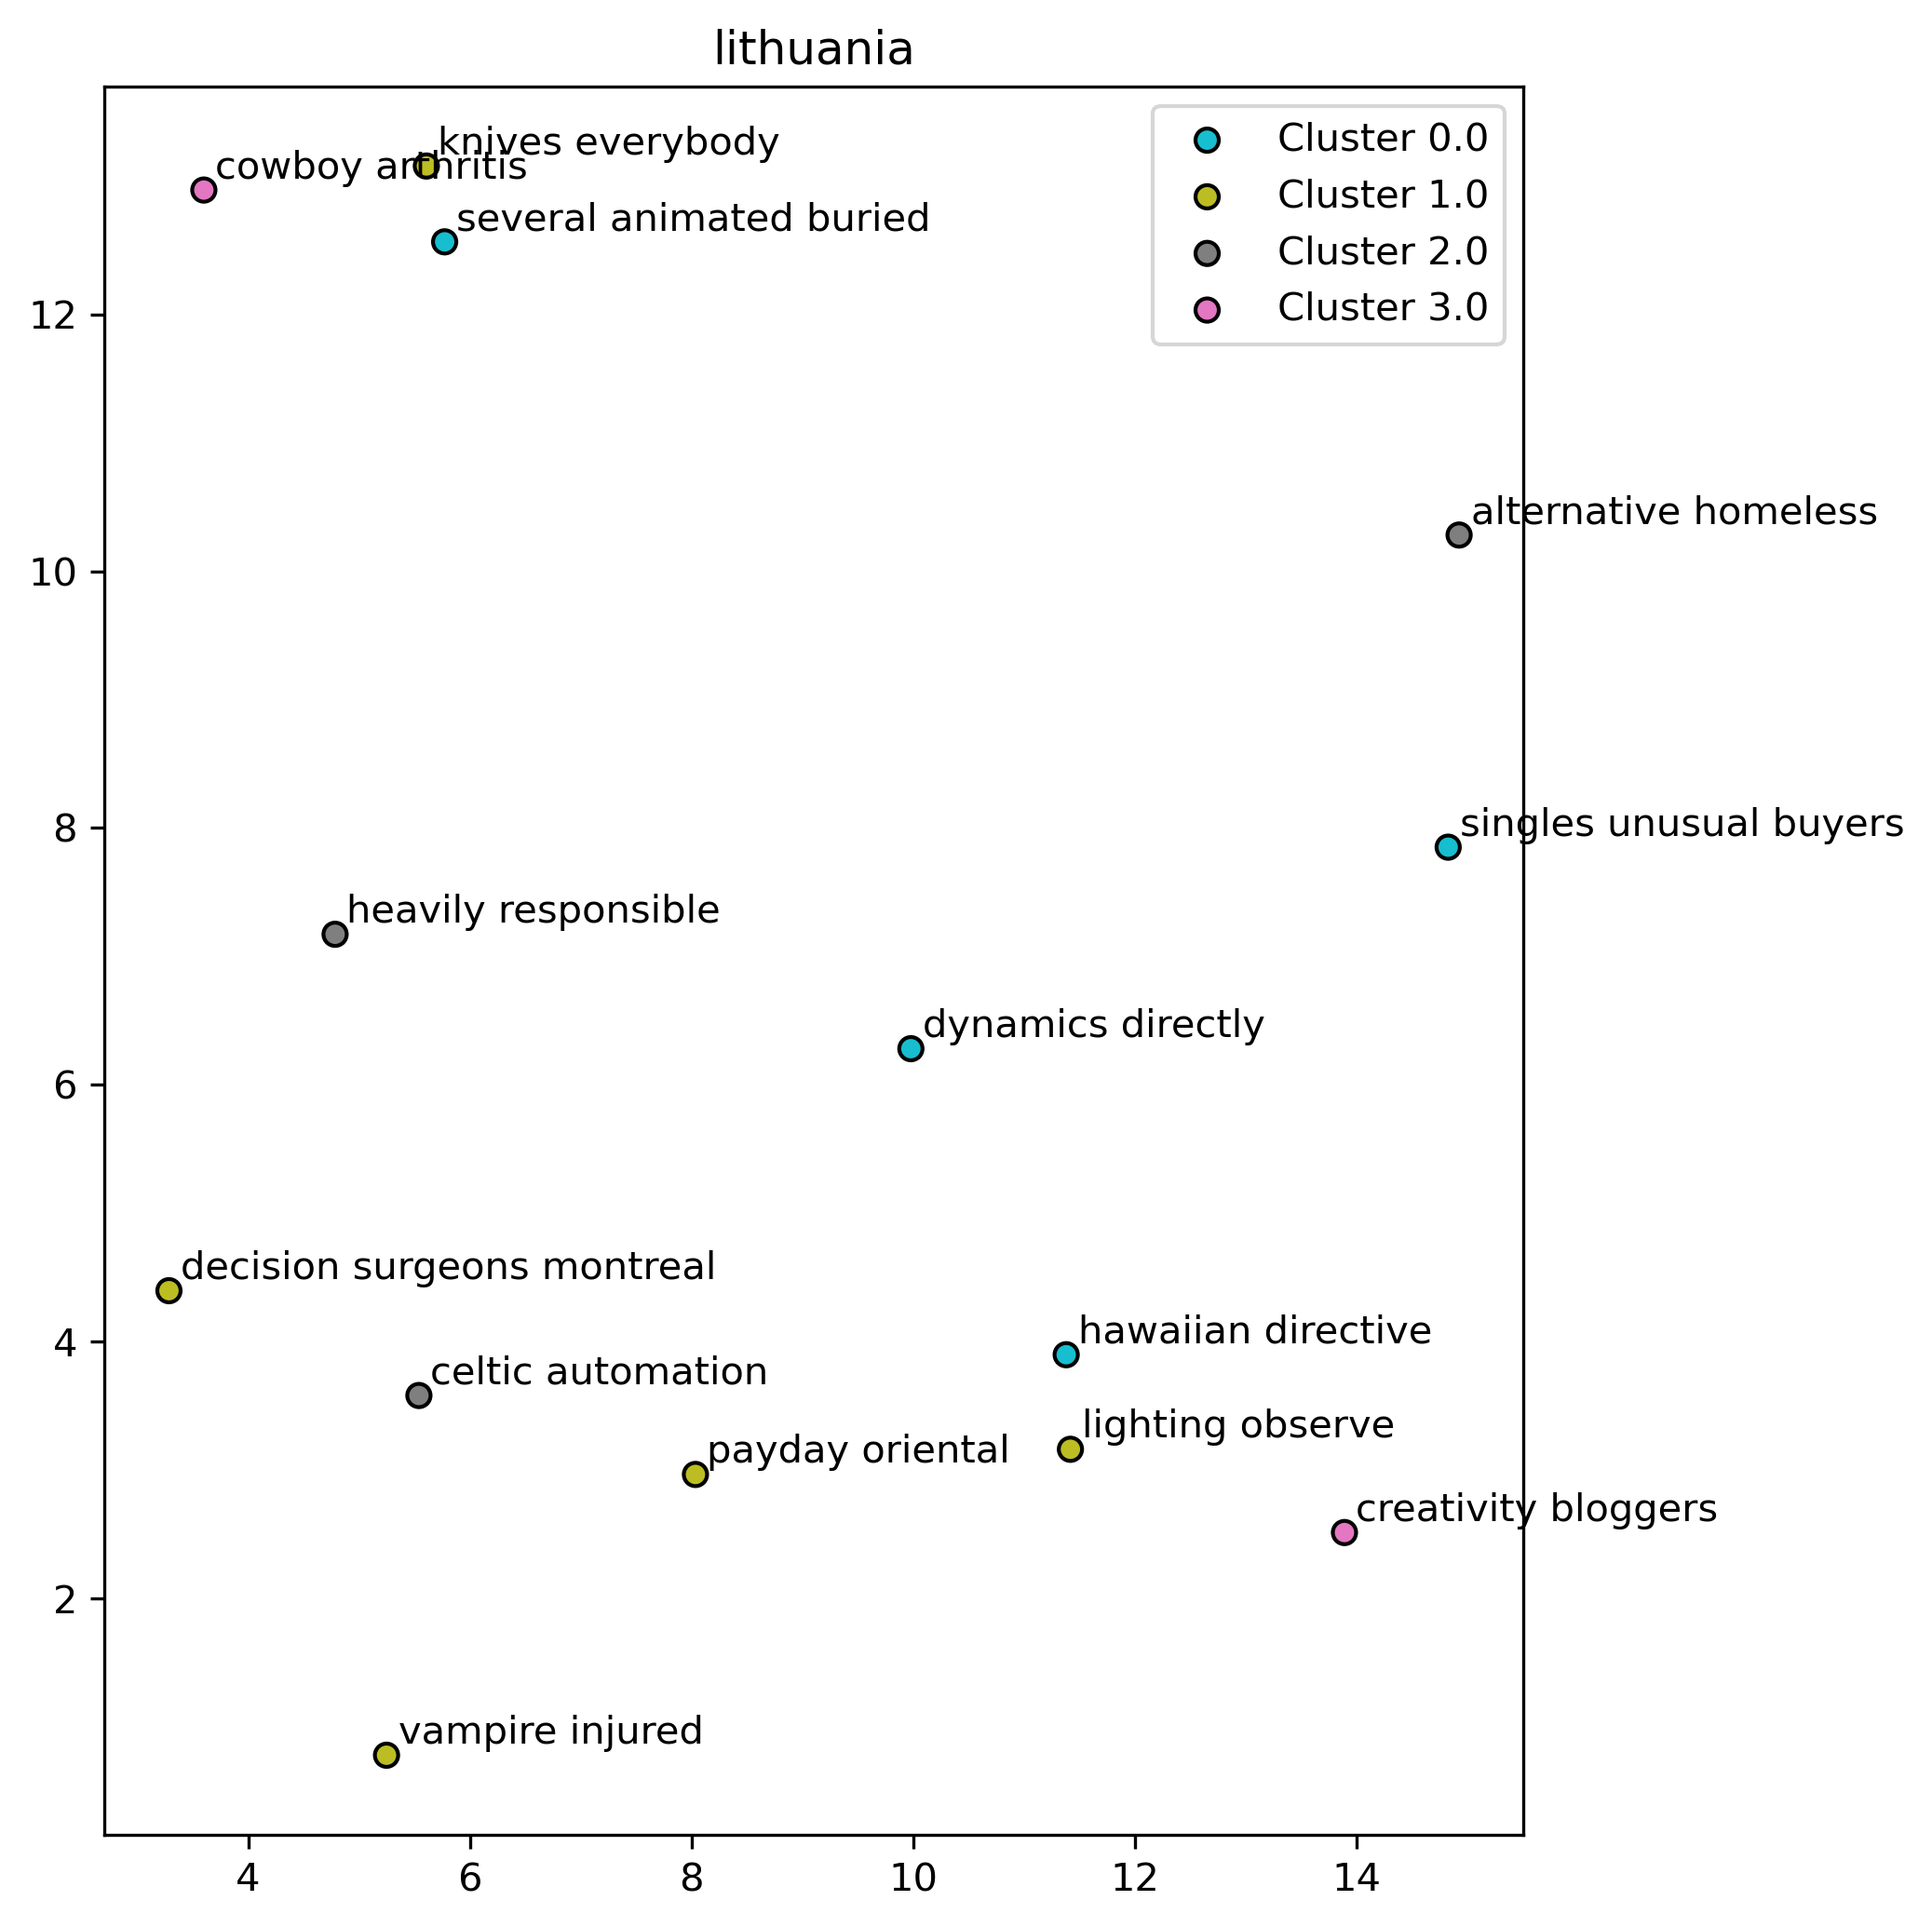

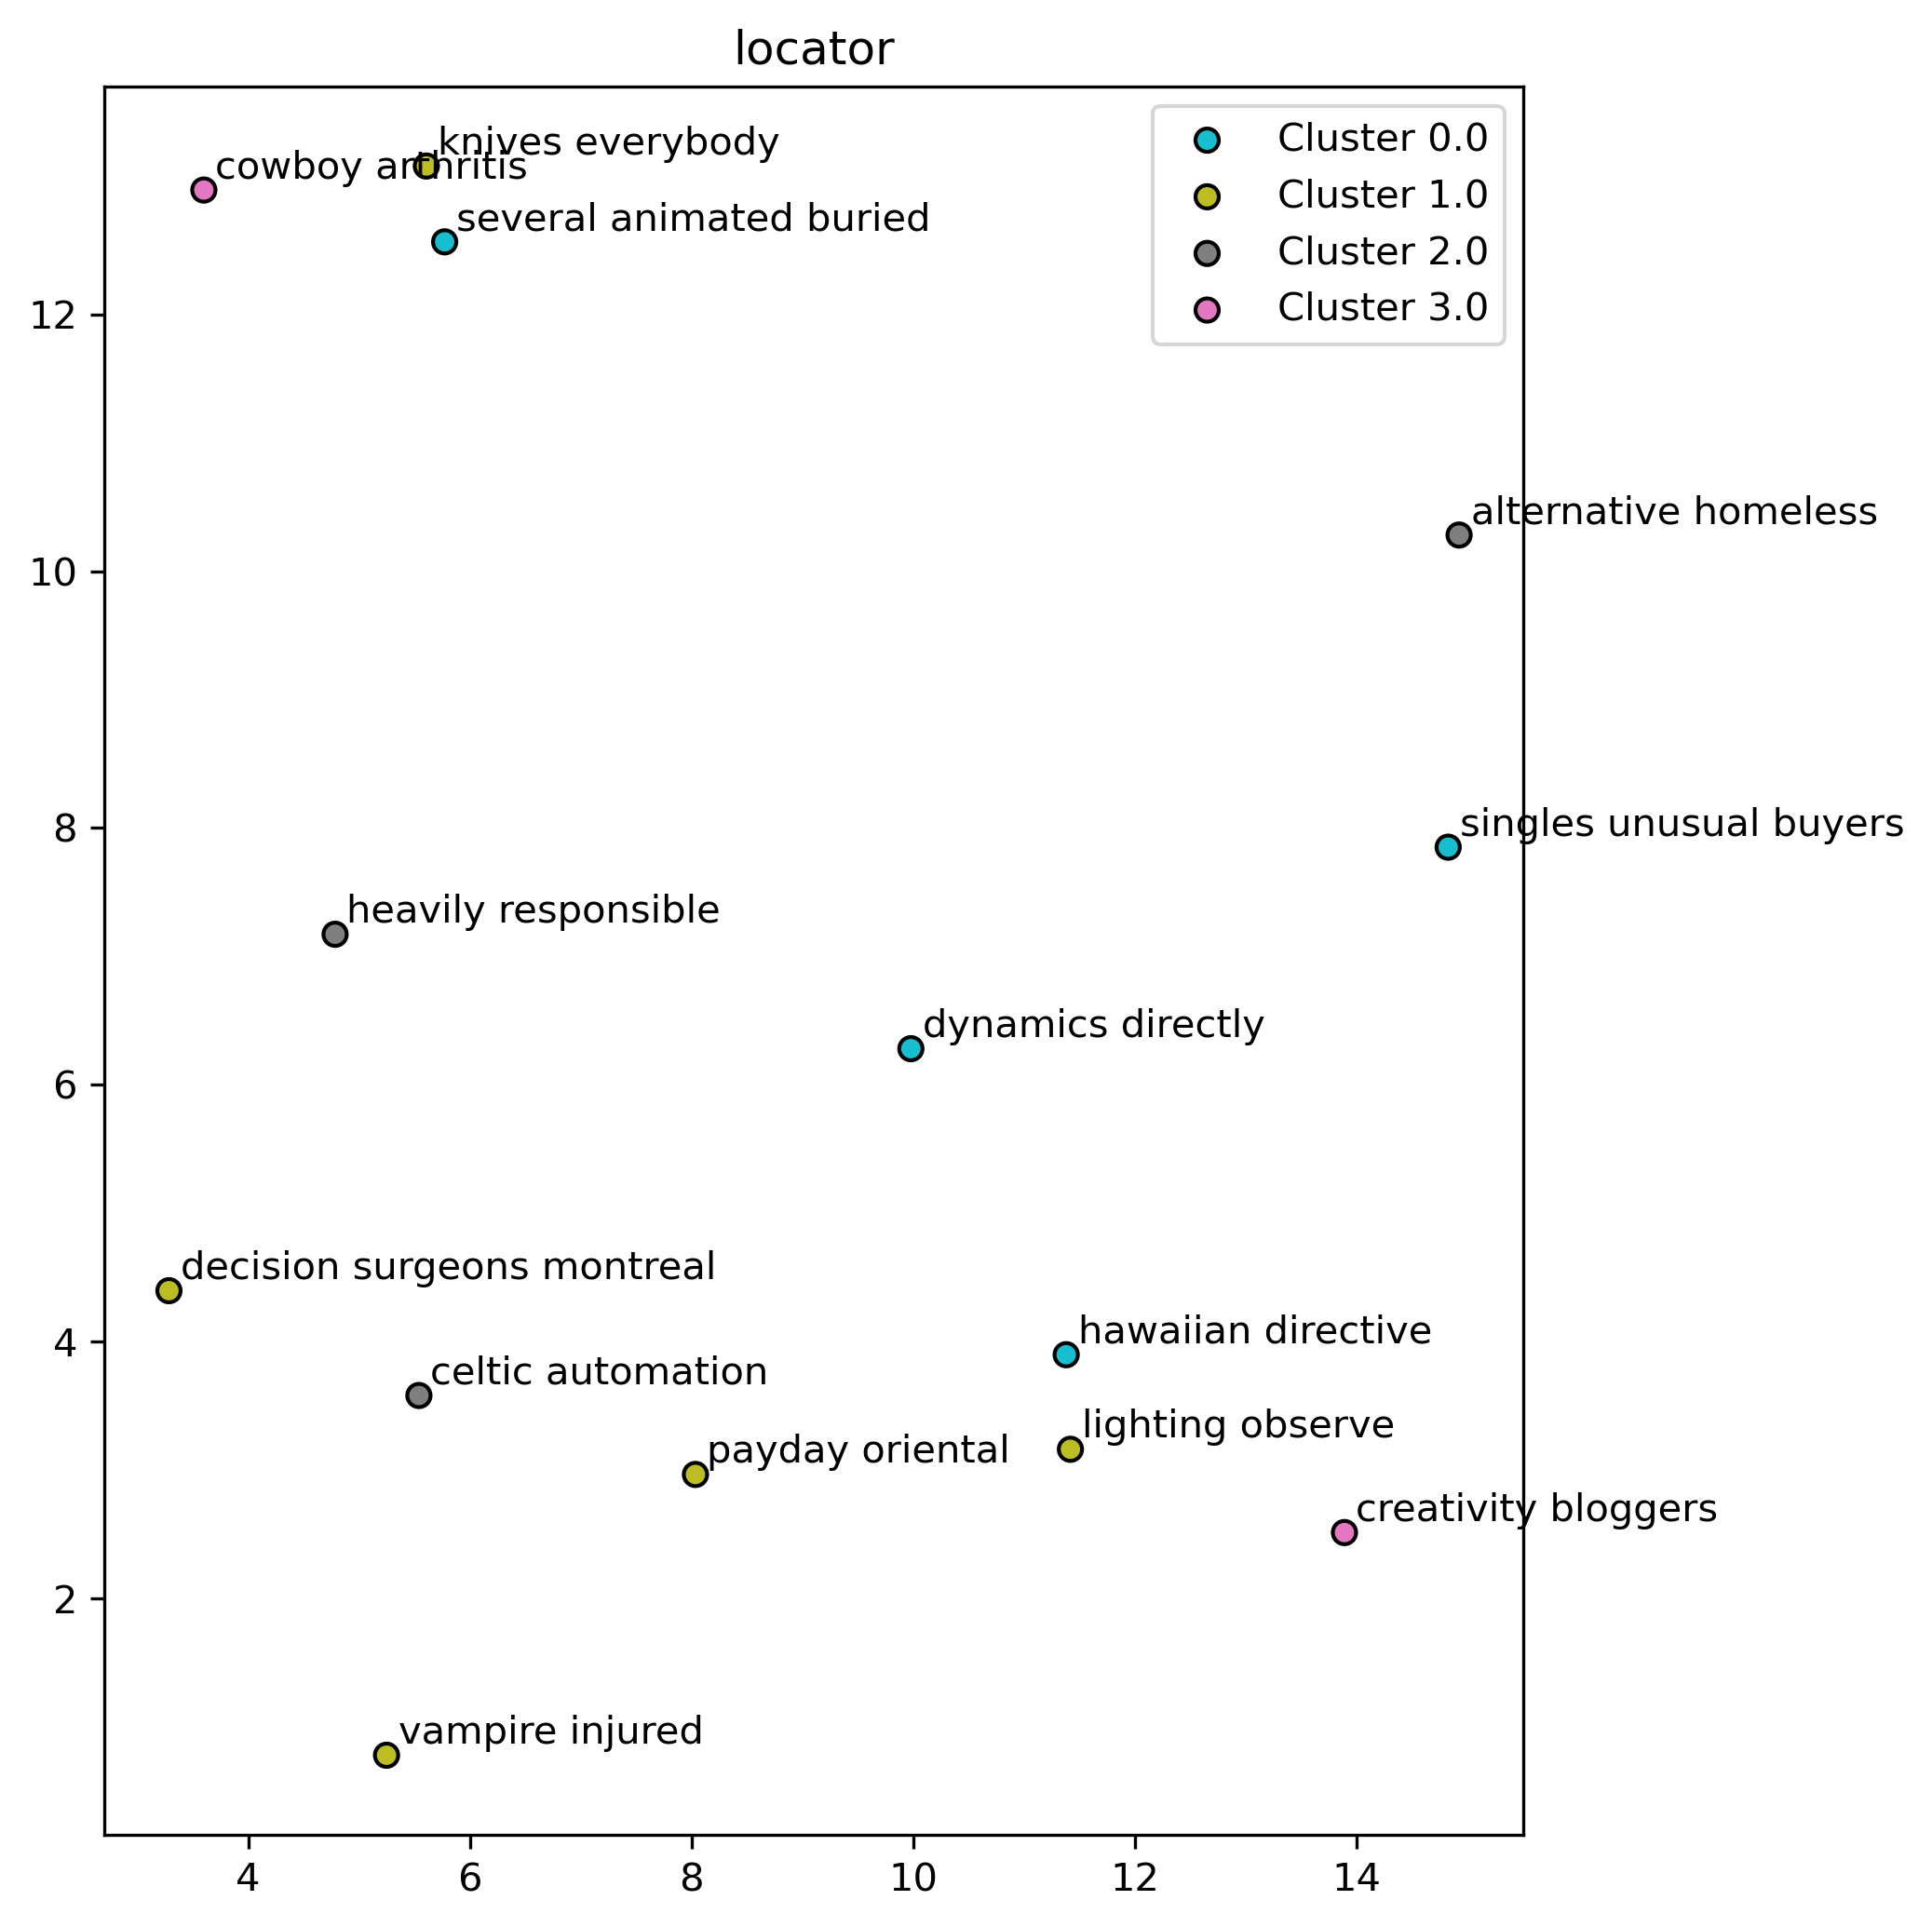

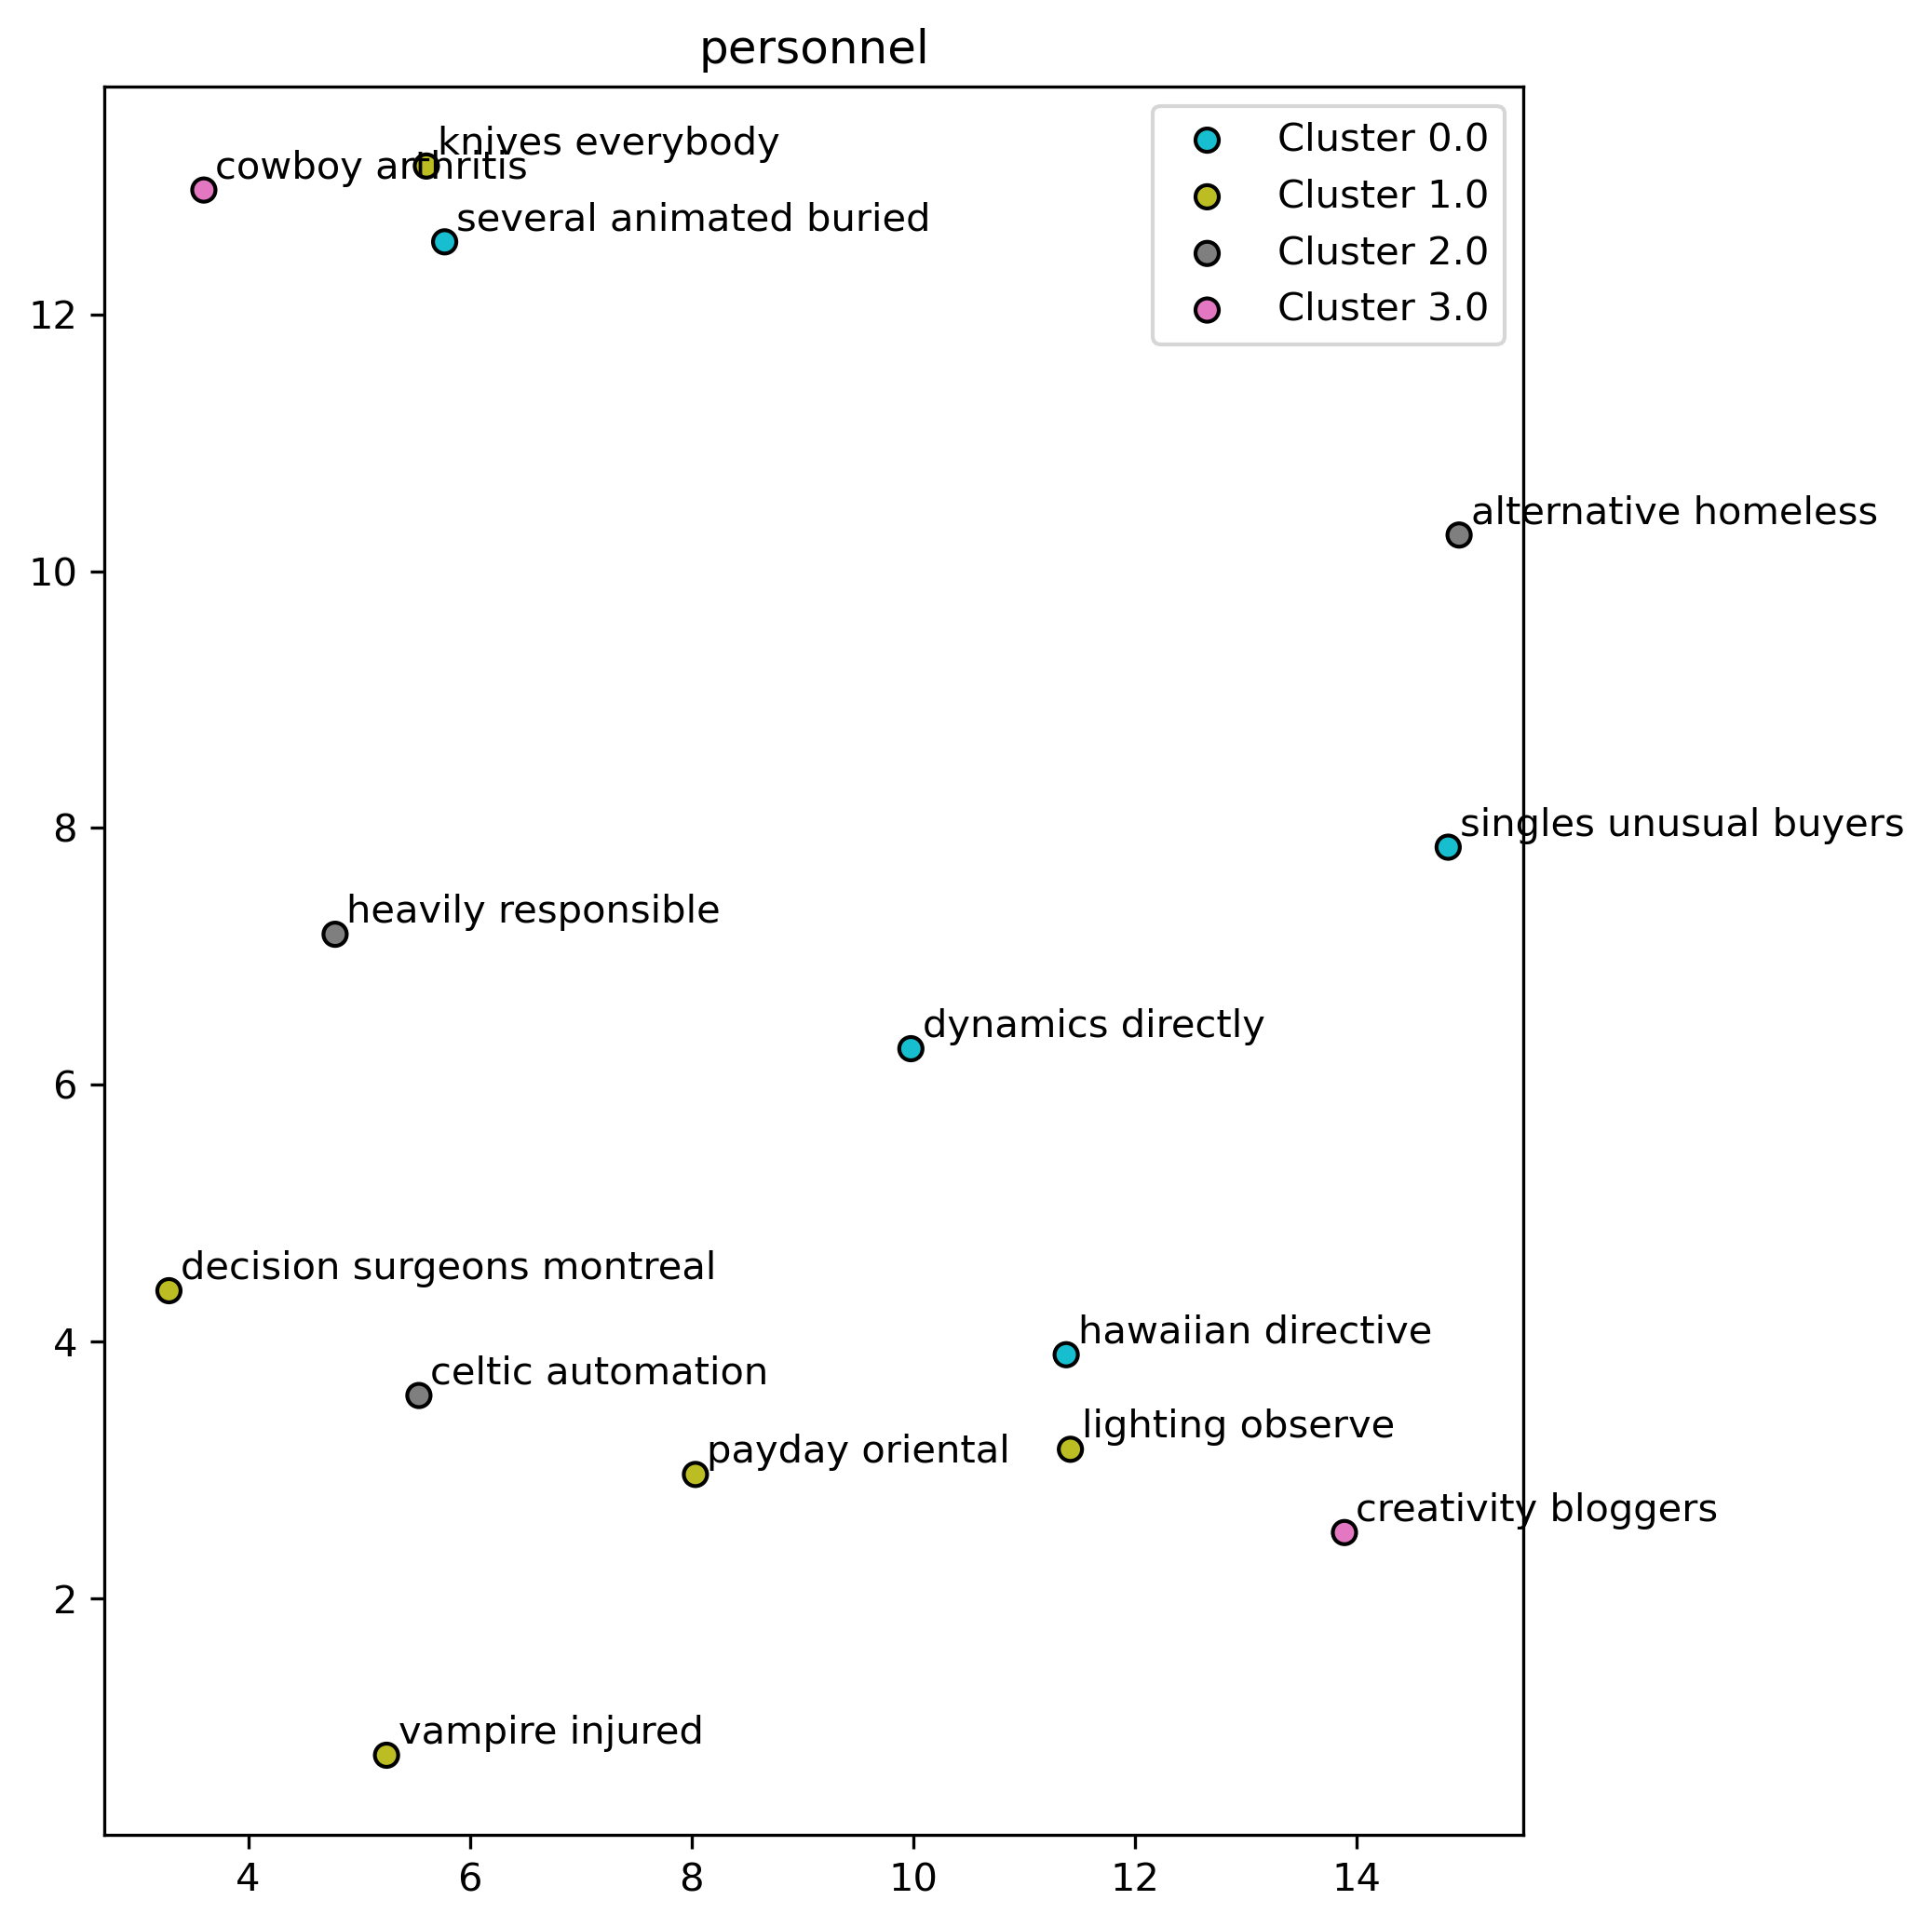

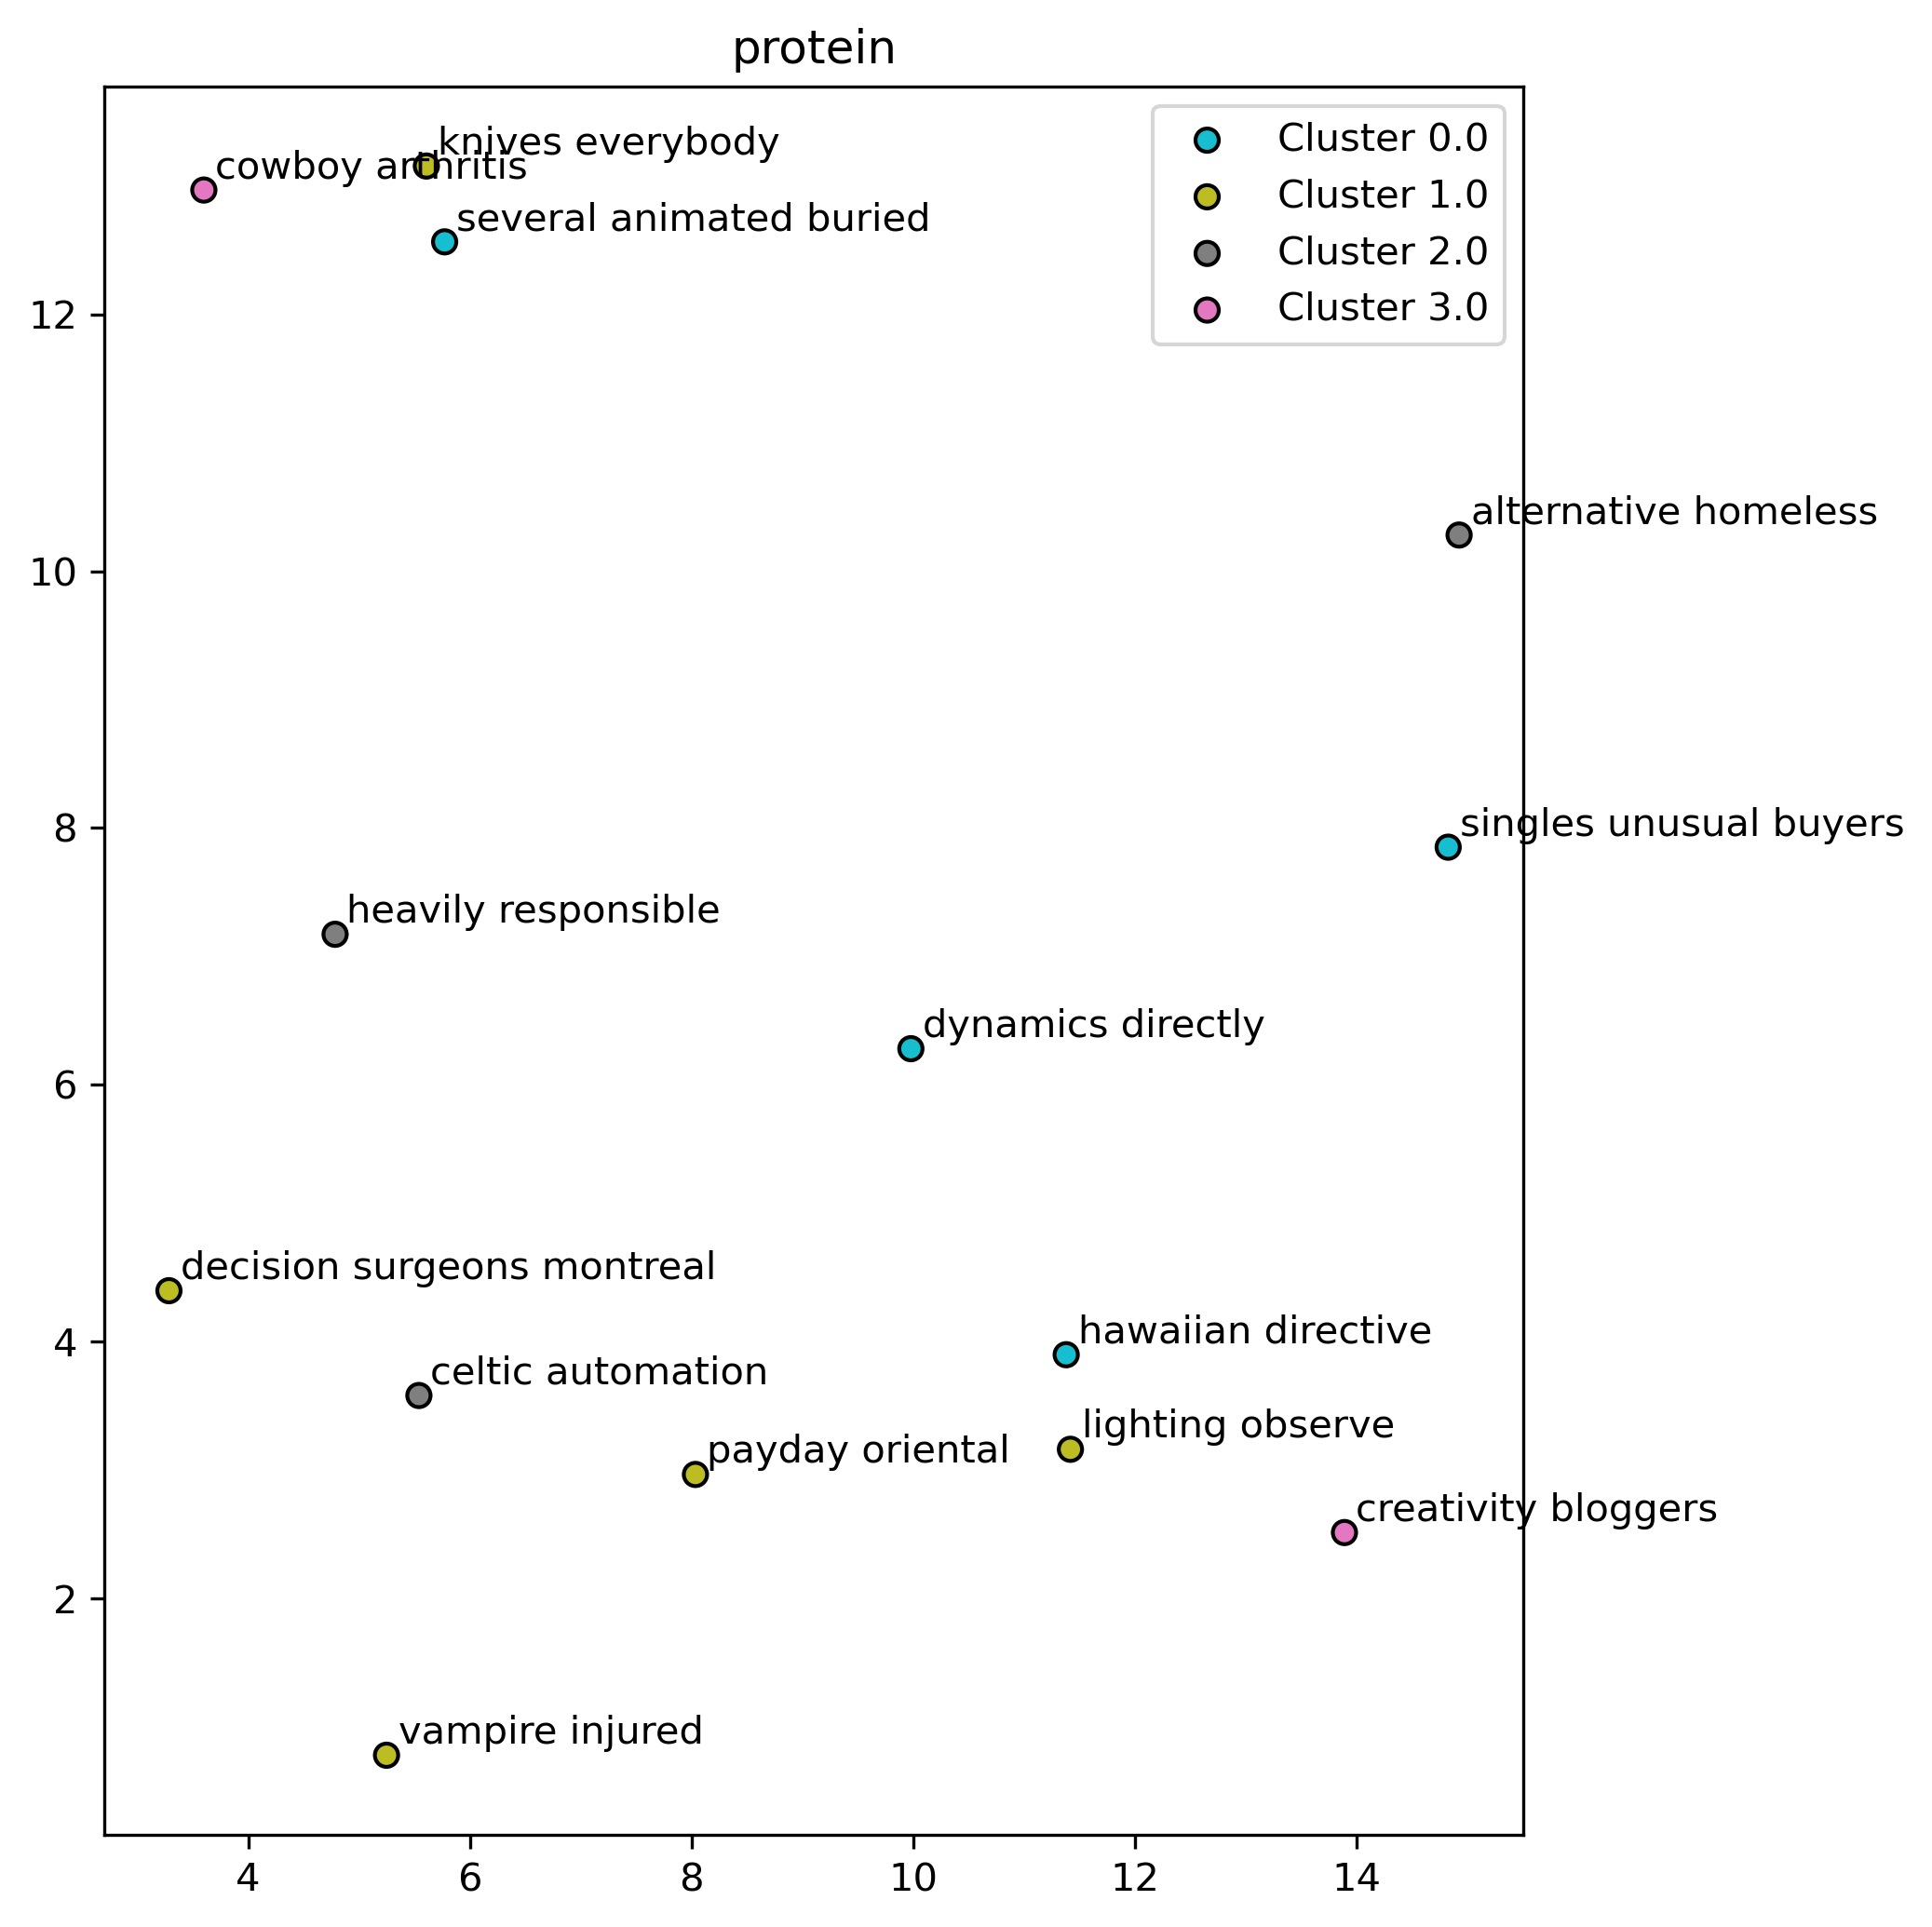

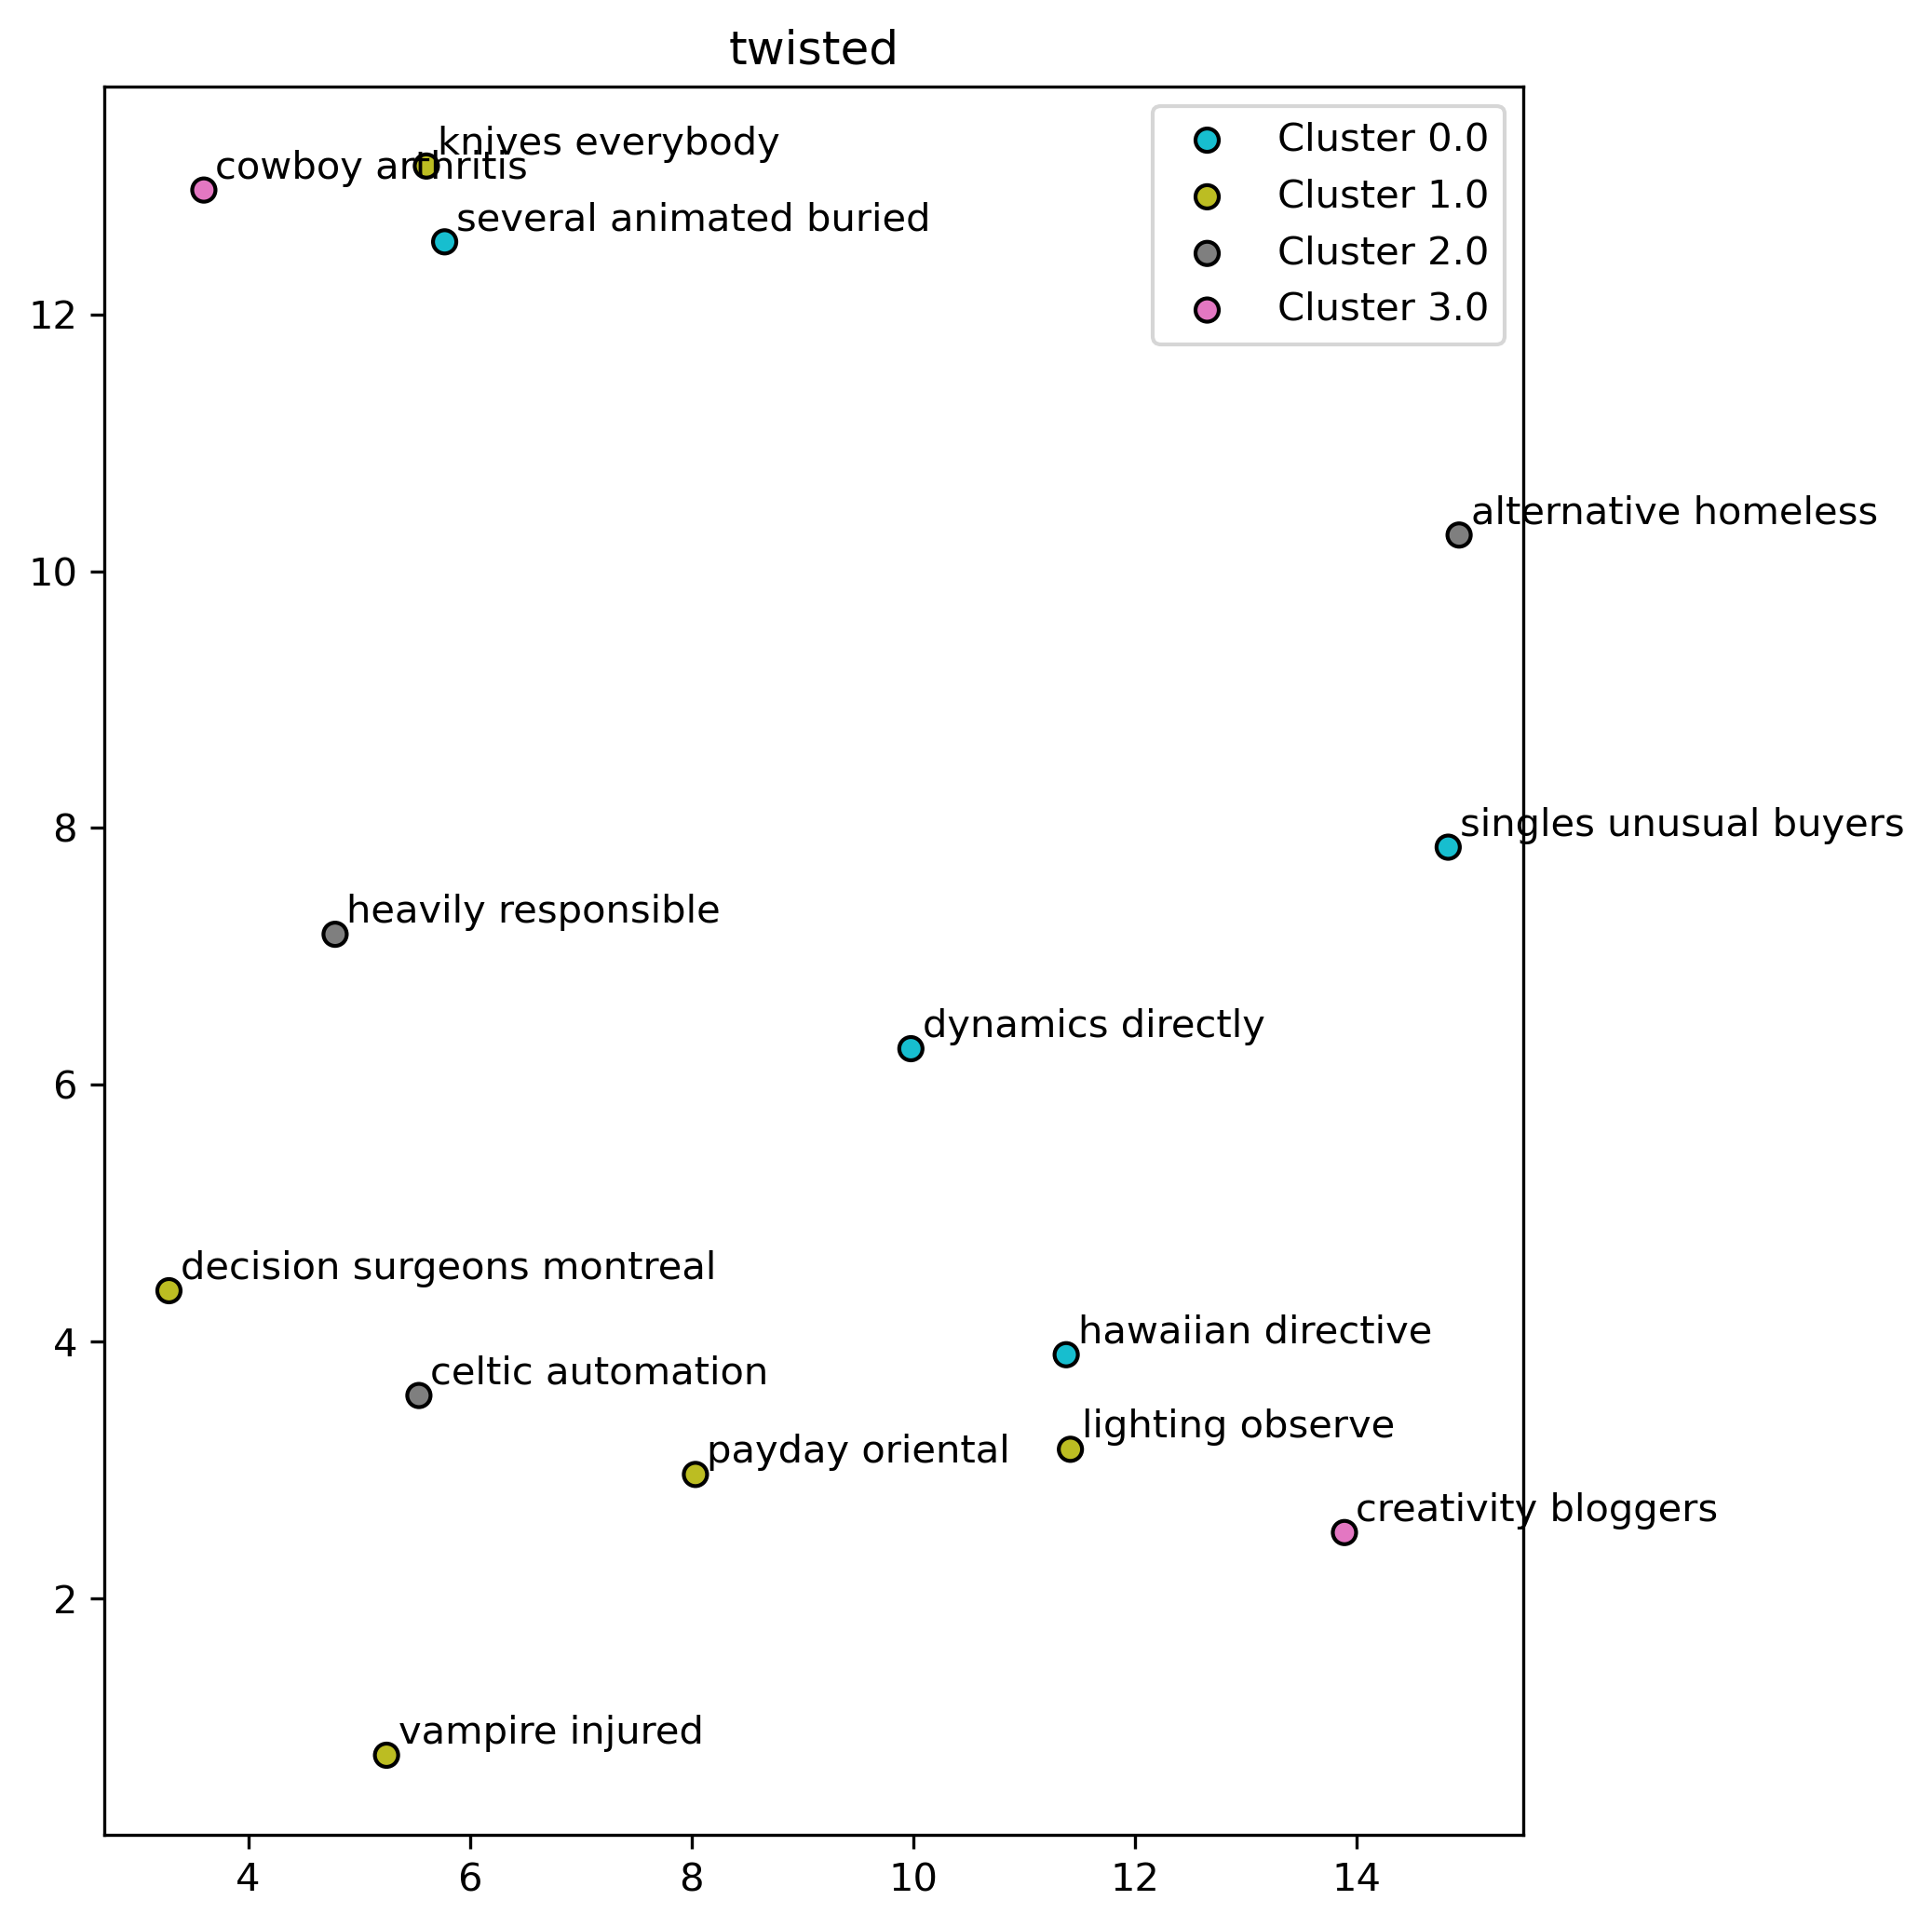

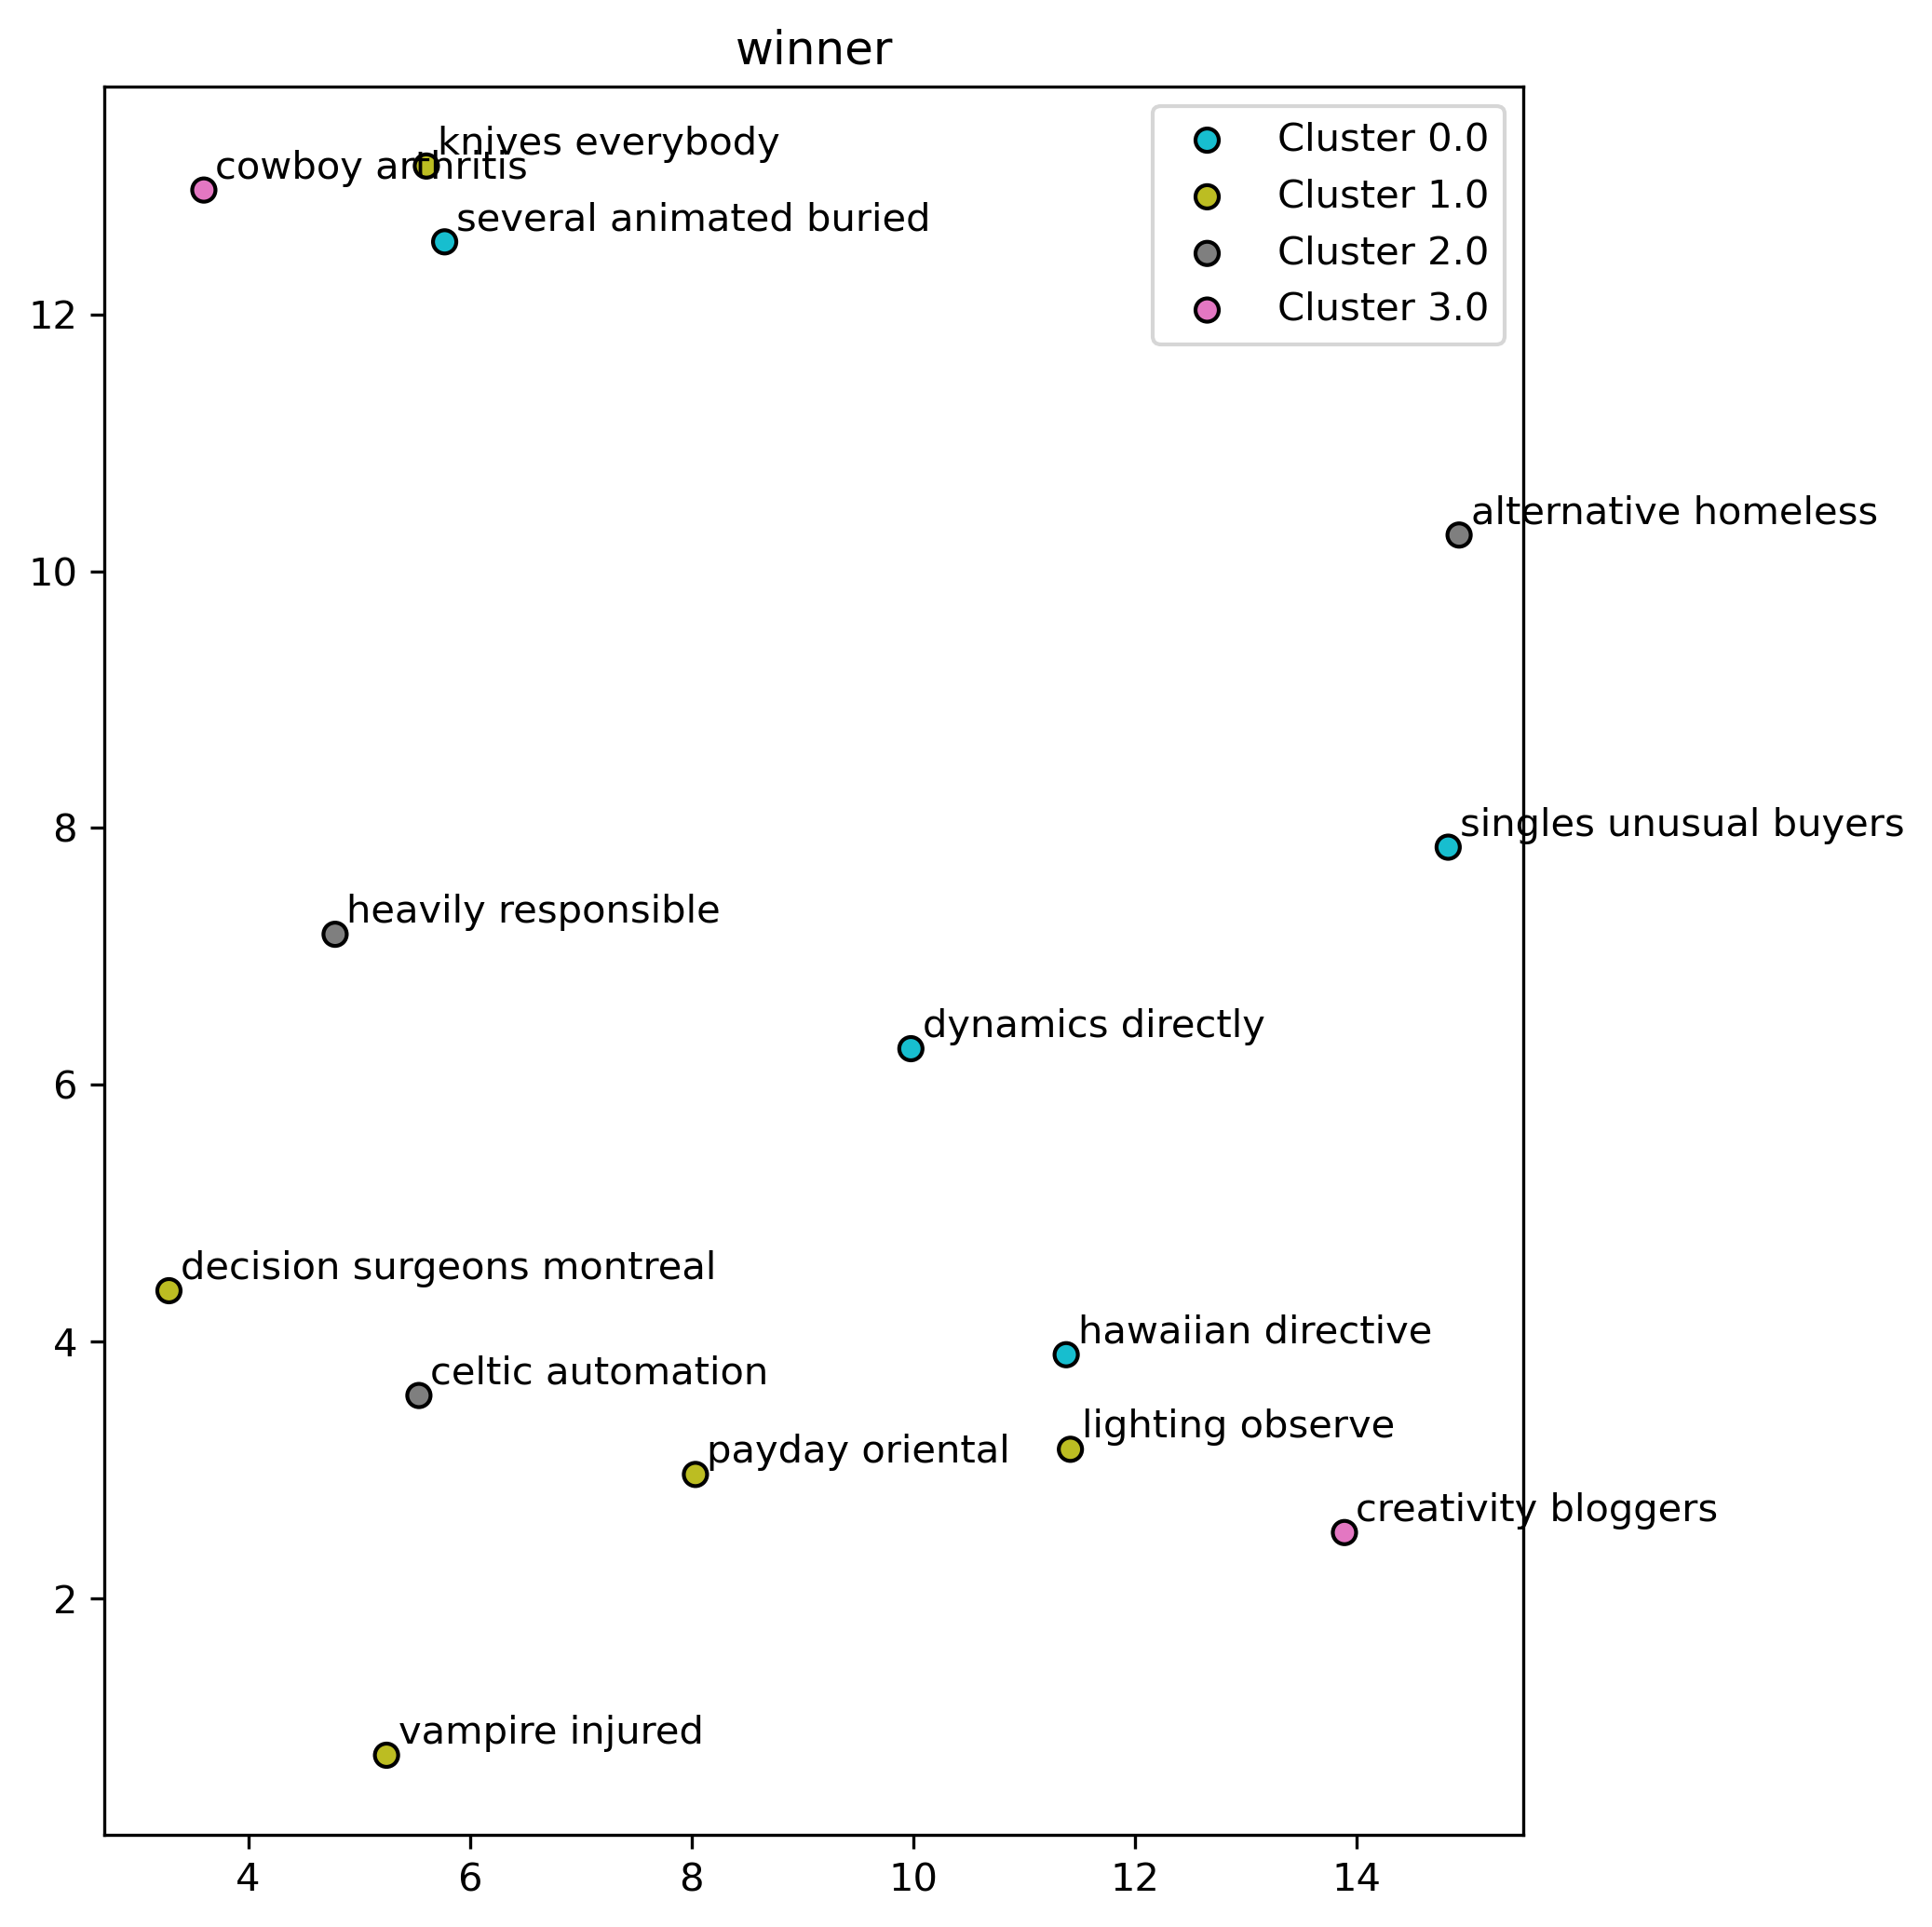

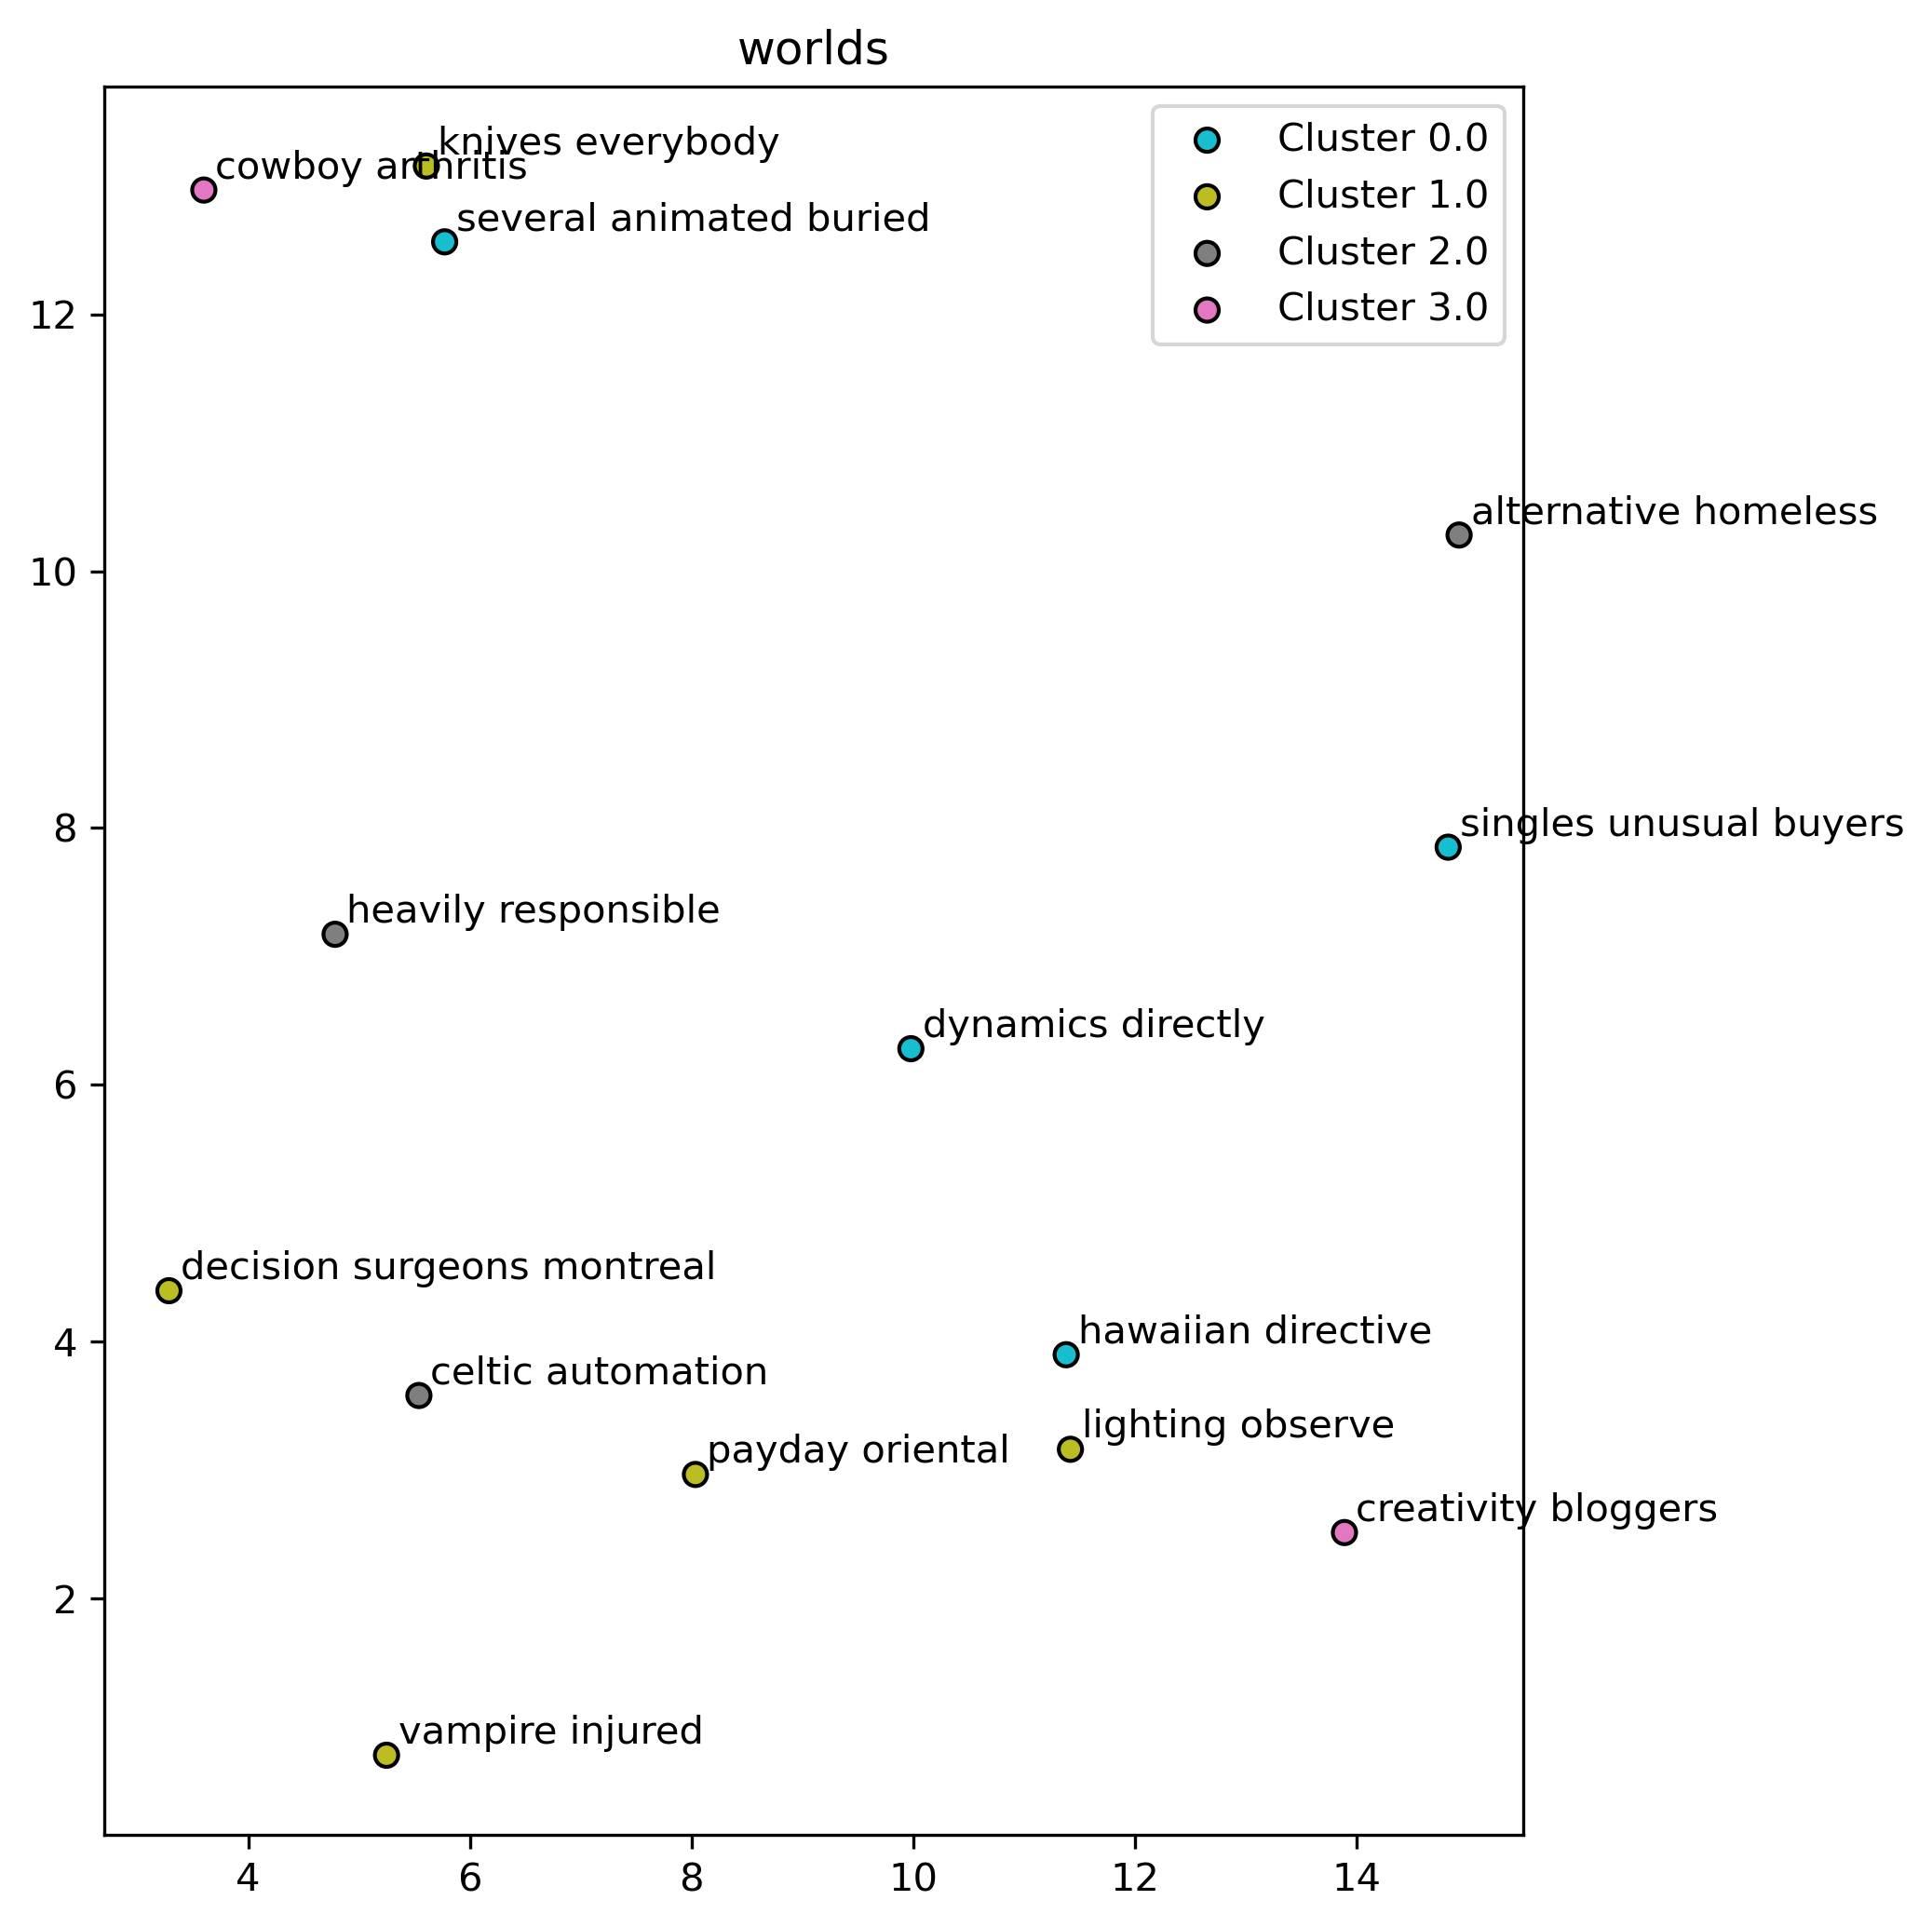

In [47]:
# Часть 2

areas = list(data.area.unique())

for area in areas:
    plt.figure(dpi=300, figsize=(7, 7)) # plot resolution and scale

    for cluster in plot_data.cluster.unique():
        plt.scatter(
            plot_data['x'][plot_data.cluster == cluster], 
            plot_data['y'][plot_data.cluster == cluster],
            label=f'Cluster {cluster}',
            c=plot_data['color'][plot_data.cluster == cluster],
            marker = 'o',
            edgecolors = 'black'
        ) # plot subset of data that should have the same color
        for _, point in plot_data[plot_data.cluster == cluster].iterrows():
            plt.annotate(
                point['keyword'], 
                (point['x'], point['y']), 
                xytext=(3,3), textcoords='offset points'
            ) # annotate points
    plt.legend(loc='upper right') # locate legend
    plt.title(area)
    plt.tight_layout() # recalculate positions of all automatically placed elements (tick labels, axis titles, etc.)